<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_1751-1800.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11501]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [11502]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

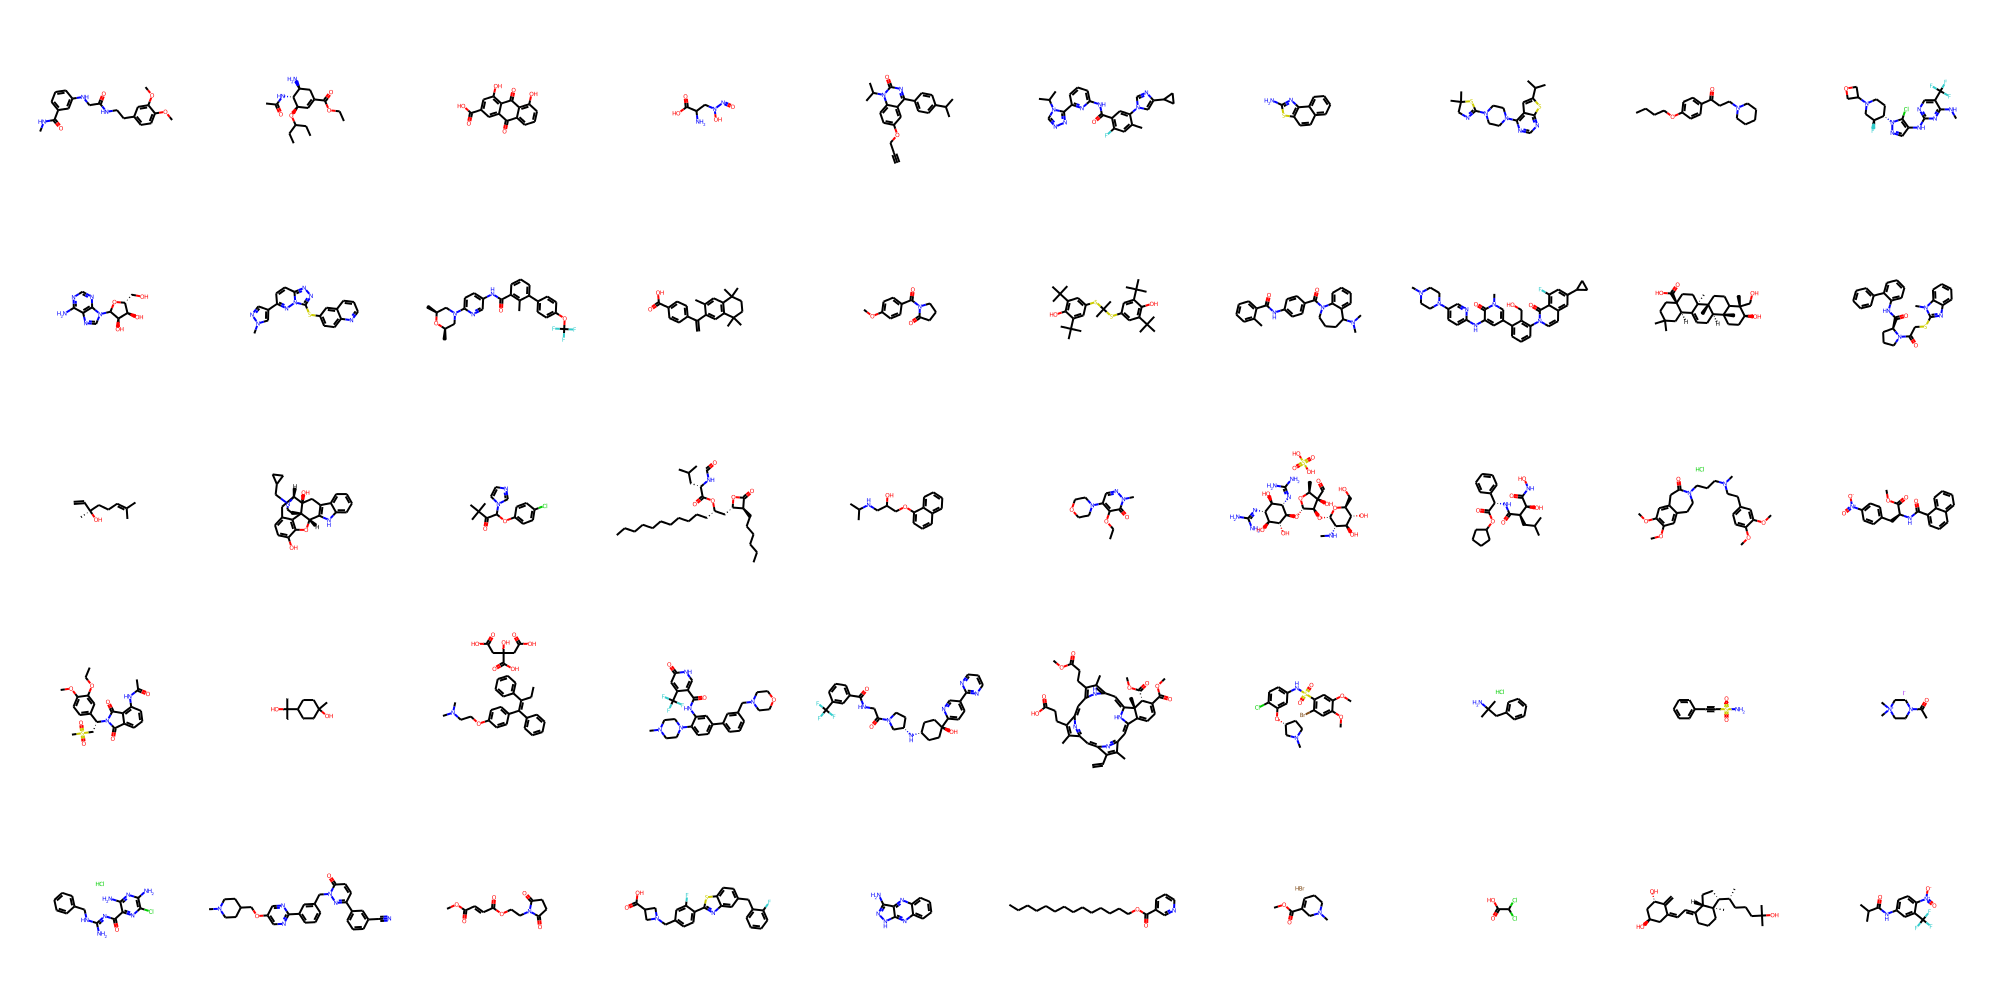

In [11503]:
smiles_list = [

'CNC(=O)c1cccc(NCC(=O)NCCc2ccc(OC)c(OC)c2)c1',
'CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@H](N)C1',
'O=C(O)c1cc(O)c2c(c1)C(=O)c1cccc(O)c1C2=O',
'NC(CN(O)N=O)C(=O)O',
'C#CCOc1ccc2c(c1)c(-c1ccc(C(C)C)cc1)nc(=O)n2C(C)C',
'Cc1cc(F)c(C(=O)Nc2cccc(-c3nncn3C(C)C)n2)cc1-n1cnc(C2CC2)c1',
'Nc1nc2c(ccc3ccccc32)s1',
'CC(C)c1cc2c(N3CCN(C4=NCC(C)(C)S4)CC3)ncnc2s1',
'CCCCOc1ccc(C(=O)CCN2CCCCC2)cc1',
'CNc1nc(Nc2cnn([C@H]3CCN(C4COC4)C[C@@H]3F)c2Cl)ncc1C(F)(F)F',
'Nc1ncnc2c1ncn2C1O[C@H](CO)[C@@H](O)[C@H]1O',
'Cn1cc(-c2ccc3nnc(Sc4ccc5ncccc5c4)n3n2)cn1',
'Cc1c(C(=O)Nc2ccc(N3C[C@H](C)O[C@H](C)C3)nc2)cccc1-c1ccc(OC(F)(F)F)cc1',
'C=C(c1ccc(C(=O)O)cc1)c1cc2c(cc1C)C(C)(C)CCC2(C)C',
'COc1ccc(C(=O)N2CCCC2=O)cc1',
'CC(C)(Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1',
'Cc1ccccc1C(=O)Nc1ccc(C(=O)N2CCCC(N(C)C)c3ccccc32)cc1',
'CN1CCN(c2ccc(Nc3cc(-c4cccc(-n5ccc6cc(C7CC7)cc(F)c6c5=O)c4CO)cn(C)c3=O)nc2)CC1',
'CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@@]5(C)CC[C@H](O)[C@@](C)(CO)C5CC[C@]43C)[C@H]2C1',
'Cn1c(SCC(=O)N2CCC[C@H]2C(=O)Nc2ccccc2-c2ccccc2)nc2ccccc21',
'C=C[C@](C)(O)CCC=C(C)C',
'Oc1ccc2c3c1O[C@H]1c4[nH]c5ccccc5c4C[C@@]4(O)[C@@H](C2)N(CC2CC2)CC[C@]314',
'CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1',
'CCCCCCCCCCC[C@@H](C[C@@H]1OC(=O)[C@H]1CCCCCC)OC(=O)[C@H](CC(C)C)NC=O',
'CC(C)NCC(O)COc1cccc2ccccc12',
'CCOc1c(N2CCOCC2)cnn(C)c1=O',
'CN[C@@H]1[C@H](O[C@H]2[C@H](O[C@@H]3[C@@H](N=C(N)N)[C@H](O)[C@@H](N=C(N)N)[C@H](O)[C@H]3O)O[C@@H](C)[C@]2(O)C=O)O[C@@H](CO)[C@H](O)[C@H]1O.O=S(=O)(O)O',
'CC(C)C[C@@H](C(=O)N[C@H](C(=O)OC1CCCC1)c1ccccc1)[C@H](O)C(=O)NO',
'COc1ccc(CCN(C)CCCN2CCc3cc(OC)c(OC)cc3CC2=O)cc1OC.Cl',
'COC(=O)[C@H](Cc1ccc([N+](=O)[O-])cc1)NC(=O)c1cccc2ccccc12',
'CCOc1cc([C@@H](CS(C)(=O)=O)N2C(=O)c3cccc(NC(C)=O)c3C2=O)ccc1OC',
'CC1(O)CCC(C(C)(C)O)CC1',
'CC/C(=C(\c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1.O=C(O)CC(O)(CC(=O)O)C(=O)O',
'CN1CCN(c2ccc(-c3cccc(CN4CCOCC4)c3)cc2NC(=O)c2c[nH]c(=O)cc2C(F)(F)F)CC1',
'O=C(NCC(=O)N1CC[C@H](N[C@H]2CC[C@@](O)(c3ccc(-c4ncccn4)cn3)CC2)C1)c1cccc(C(F)(F)F)c1',
'C=CC1=C(C)c2cc3[nH]c(cc4[nH]c(cc5nc(cc1n2)C(C)=C5CCC(=O)O)c(CCC(=O)OC)c4C)[C@@]1(C)C3=CC=C(C(=O)OC)[C@H]1C(=O)OC',
'COc1cc(Br)c(S(=O)(=O)Nc2ccc(Cl)c(O[C@@H]3CCN(C)C3)c2)cc1OC',
'CC(C)(N)Cc1ccccc1.Cl',
'NS(=O)(=O)C#Cc1ccccc1',
'CC(=O)N1CC[N+](C)(C)CC1.[I-]',
'Cl.N/C(=N\C(=O)c1nc(Cl)c(N)nc1N)NCc1ccccc1',
'CN1CCC(COc2cnc(-c3cccc(Cn4nc(-c5cccc(C#N)c5)ccc4=O)c3)nc2)CC1',
'COC(=O)/C=C/C(=O)OCCN1C(=O)CCC1=O',
'O=C(O)C1CN(Cc2ccc(-c3nc4cc(Cc5ccccc5F)ccc4s3)c(F)c2)C1',
'Nc1n[nH]c2nc3ccccc3nc12',
'CCCCCCCCCCCCCCOC(=O)c1cccnc1',
'Br.COC(=O)C1=CCCN(C)C1',
'O=C(O)C(Cl)Cl',
'C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@H](C)CCCC(C)(C)O)C[C@@H](O)C[C@@H]1O',
'CC(C)C(=O)Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



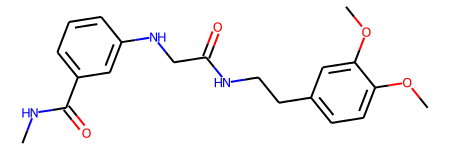

In [11504]:
M1 = mol_list [0]
M1

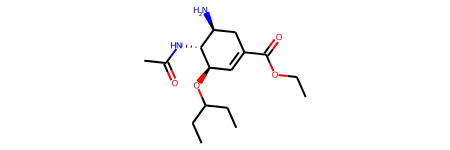

In [11505]:
M2 = mol_list [1]
M2

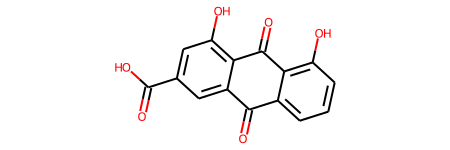

In [11506]:
M3 = mol_list [2]
M3

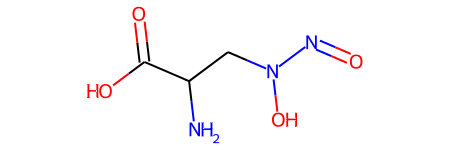

In [11507]:
M4 = mol_list [3]
M4

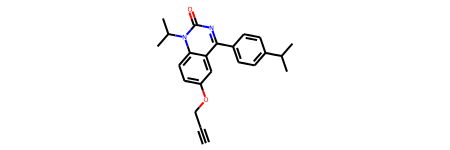

In [11508]:
M5 = mol_list [4]
M5

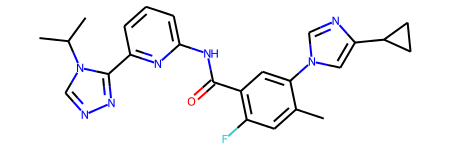

In [11509]:
M6 = mol_list [5]
M6

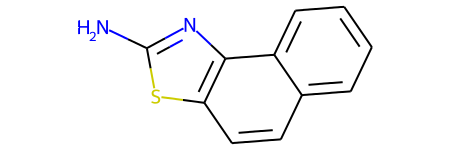

In [11510]:
M7 = mol_list [6]
M7

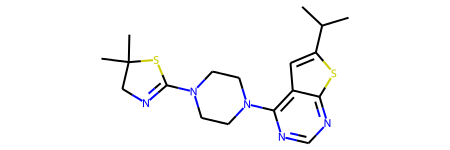

In [11511]:
M8 = mol_list [7]
M8

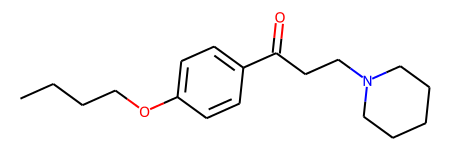

In [11512]:
M9 = mol_list [8]
M9

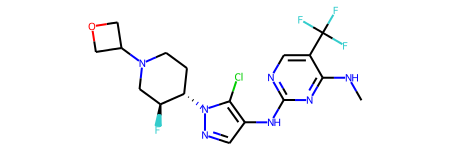

In [11513]:
M10 = mol_list [9]
M10

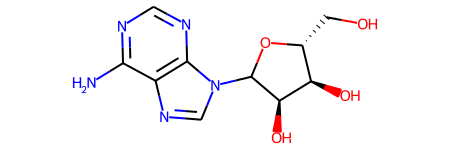

In [11514]:
M11 = mol_list [10]
M11

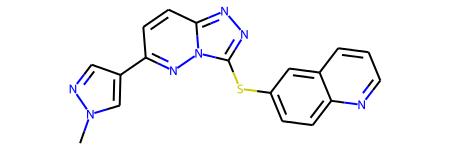

In [11515]:
M12 = mol_list [11]
M12

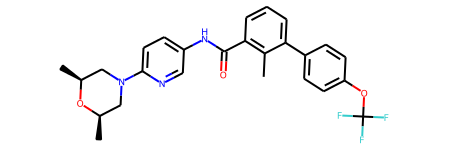

In [11516]:
M13 = mol_list [12]
M13

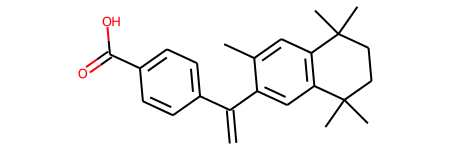

In [11517]:
M14 = mol_list [13]
M14

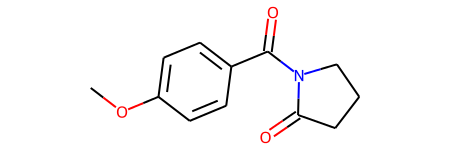

In [11518]:
M15 = mol_list [14]
M15

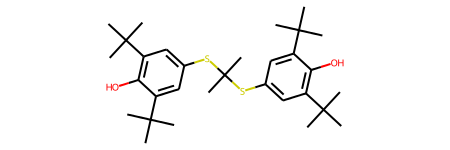

In [11519]:
M16 = mol_list [15]
M16

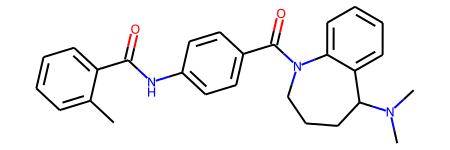

In [11520]:
M17 = mol_list [16]
M17

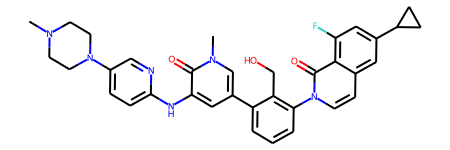

In [11521]:
M18 = mol_list [17]
M18

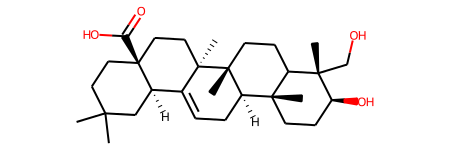

In [11522]:
M19 = mol_list [18]
M19

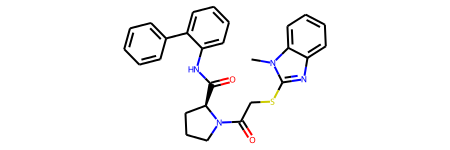

In [11523]:
M20 = mol_list [19]
M20

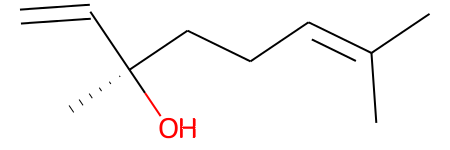

In [11524]:
M21 = mol_list [20]
M21

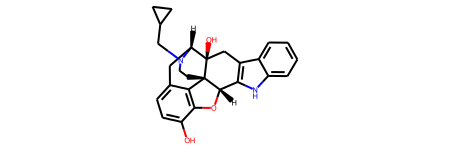

In [11525]:
M22 = mol_list [21]
M22

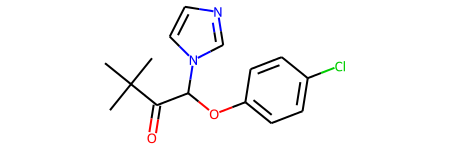

In [11526]:
M23 = mol_list [22]
M23

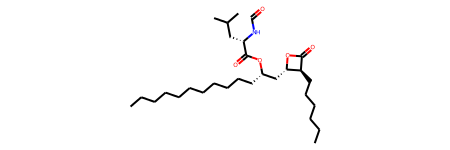

In [11527]:
M24 = mol_list [23]
M24

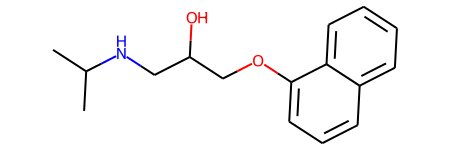

In [11528]:
M25 = mol_list [24]
M25

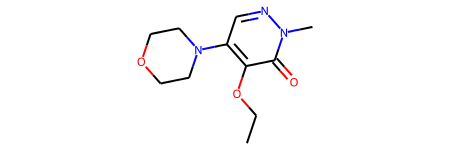

In [11529]:
M26 = mol_list [25]
M26

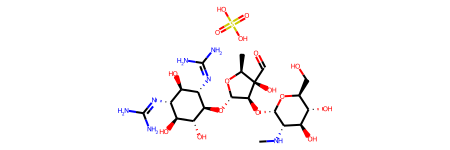

In [11530]:
M27 = mol_list [26]
M27

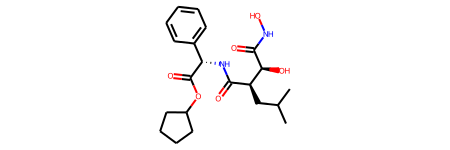

In [11531]:
M28 = mol_list [27]
M28

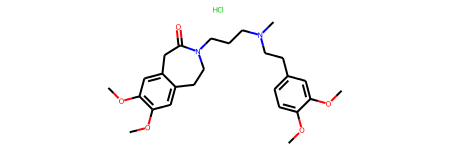

In [11532]:
M29 = mol_list [28]
M29

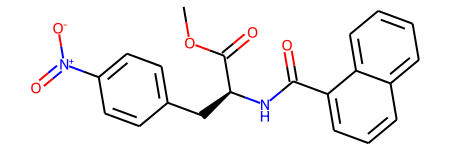

In [11533]:
M30 = mol_list [29]
M30

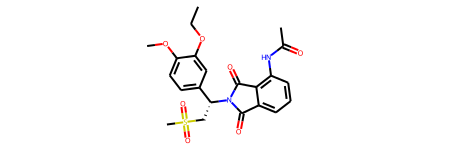

In [11534]:
M31 = mol_list [30]
M31

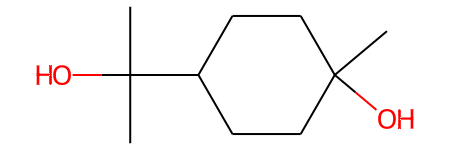

In [11535]:
M32 = mol_list [31]
M32

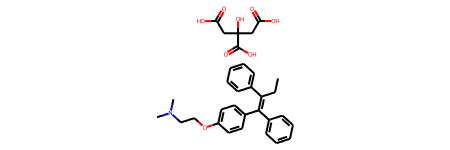

In [11536]:
M33 = mol_list [32]
M33

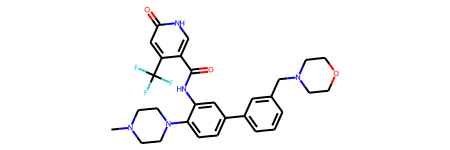

In [11537]:
M34 = mol_list [33]
M34

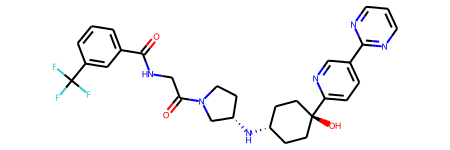

In [11538]:
M35 = mol_list [34]
M35

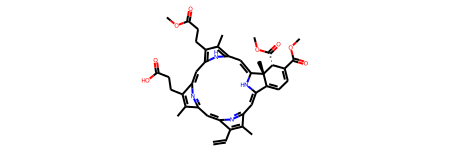

In [11539]:
M36 = mol_list [35]
M36

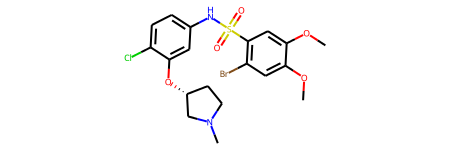

In [11540]:
M37= mol_list [36]
M37

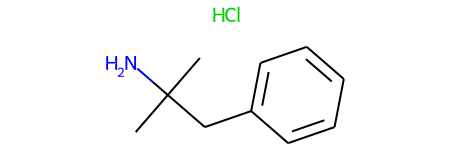

In [11541]:
M38= mol_list [37]
M38

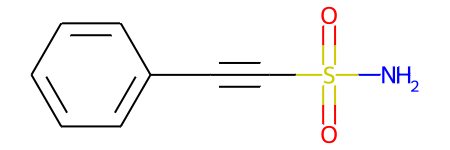

In [11542]:
M39= mol_list [38]
M39

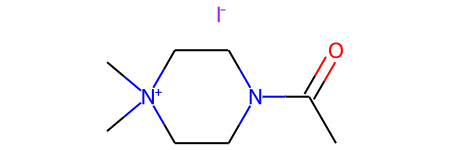

In [11543]:
M40= mol_list [39]
M40

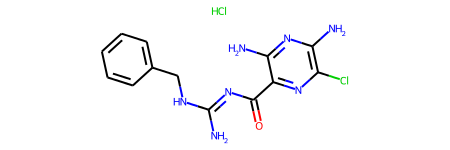

In [11544]:
M41= mol_list [40]
M41

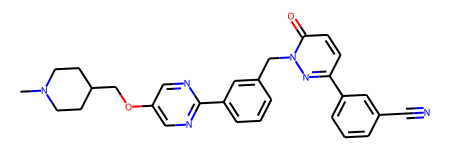

In [11545]:
M42= mol_list [41]
M42

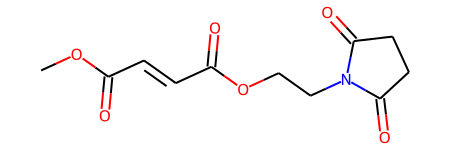

In [11546]:
M43= mol_list [42]
M43

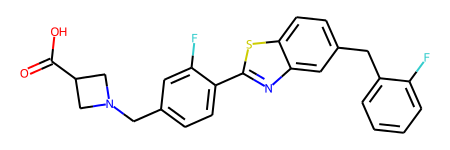

In [11547]:
M44= mol_list [43]
M44

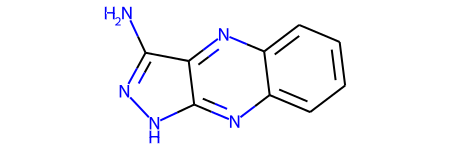

In [11548]:
M45= mol_list [44]
M45

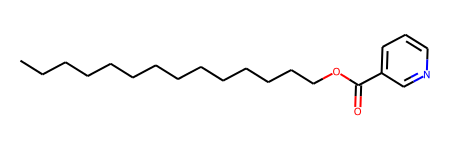

In [11549]:
M46= mol_list [45]
M46

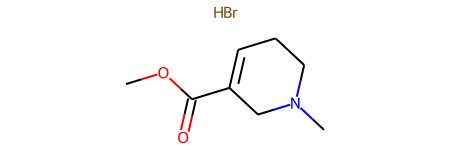

In [11550]:
M47= mol_list [46]
M47

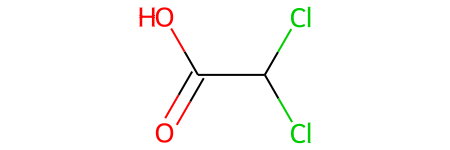

In [11551]:
M48= mol_list [47]
M48

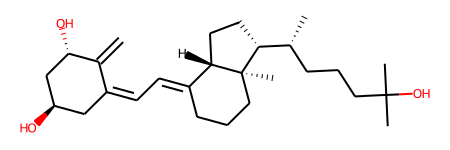

In [11552]:
M49= mol_list [48]
M49

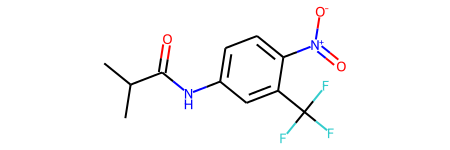

In [11553]:
M50= mol_list [49]
M50

In [11554]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[3,
 15,
 33,
 41,
 64,
 80,
 94,
 104,
 128,
 140,
 181,
 191,
 197,
 219,
 221,
 249,
 310,
 345,
 356,
 361,
 392,
 398,
 406,
 416,
 482,
 483,
 485,
 486,
 512,
 526,
 557,
 597,
 650,
 652,
 667,
 695,
 703,
 726,
 730,
 807,
 828,
 841,
 849,
 875,
 893,
 930,
 946,
 961]

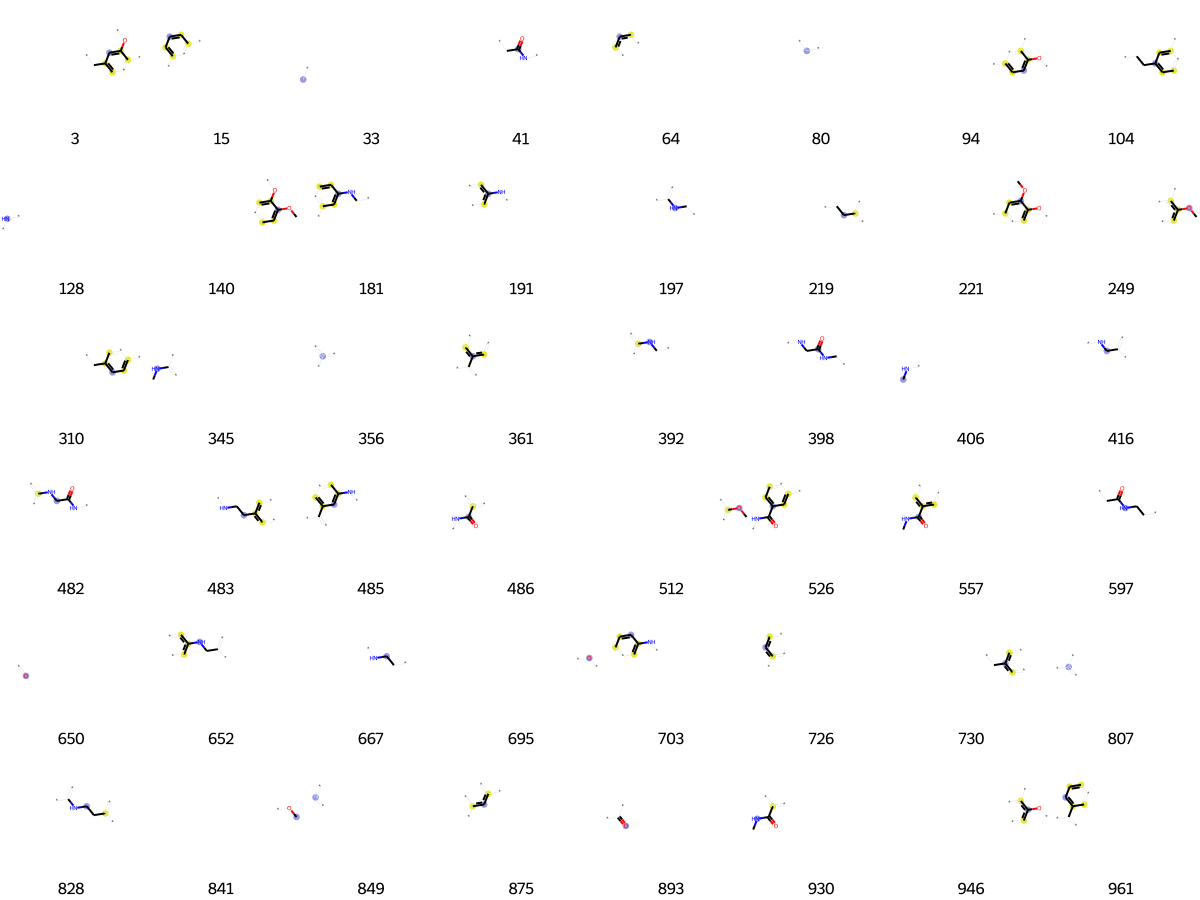

In [11555]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [11556]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[1,
 14,
 33,
 80,
 125,
 128,
 145,
 147,
 197,
 214,
 226,
 231,
 235,
 245,
 269,
 290,
 294,
 339,
 356,
 387,
 434,
 481,
 520,
 590,
 644,
 650,
 654,
 695,
 698,
 707,
 756,
 759,
 786,
 807,
 808,
 849,
 893,
 918,
 926,
 935,
 1017,
 1019]

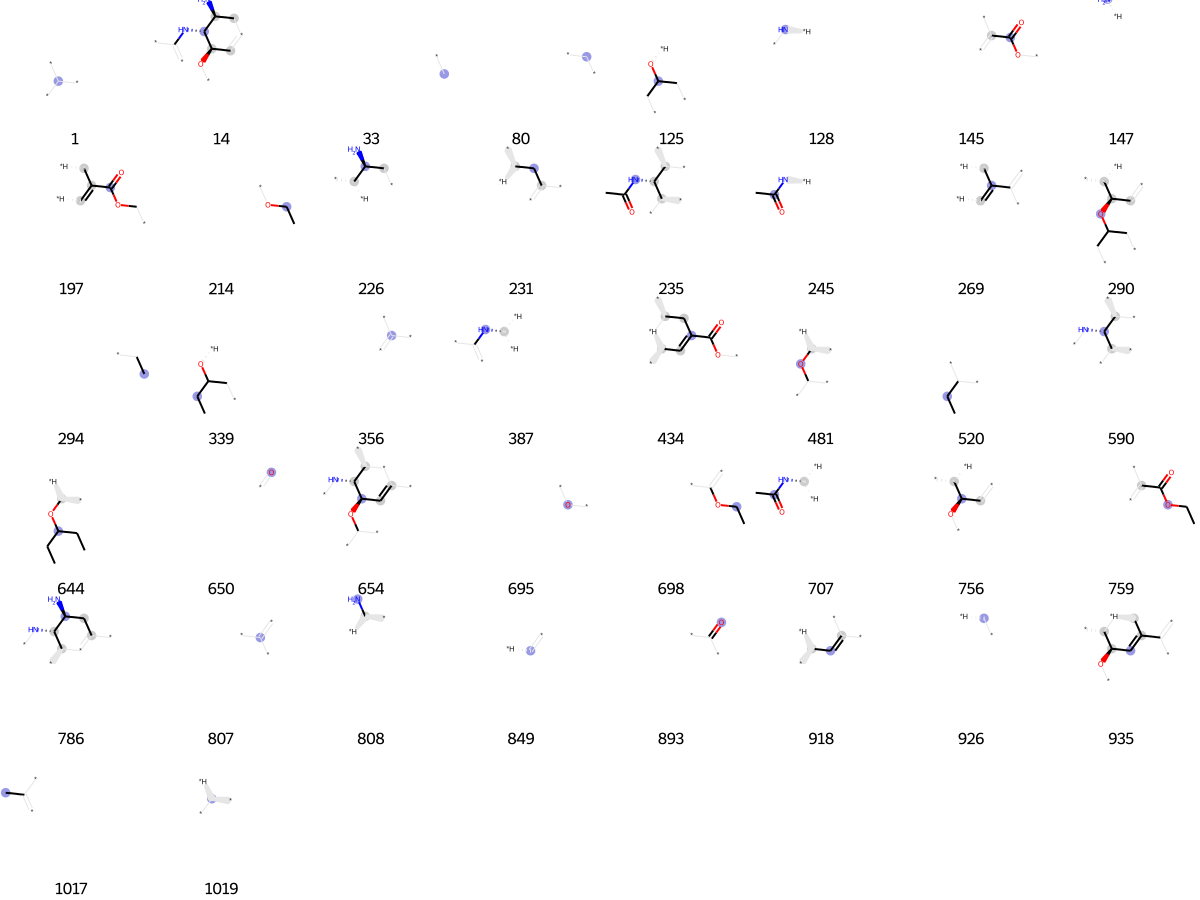

In [11557]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [11558]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[15,
 64,
 114,
 125,
 143,
 262,
 298,
 314,
 352,
 356,
 361,
 389,
 447,
 452,
 456,
 457,
 578,
 583,
 587,
 650,
 675,
 723,
 726,
 787,
 807,
 849,
 875,
 893,
 901,
 984]

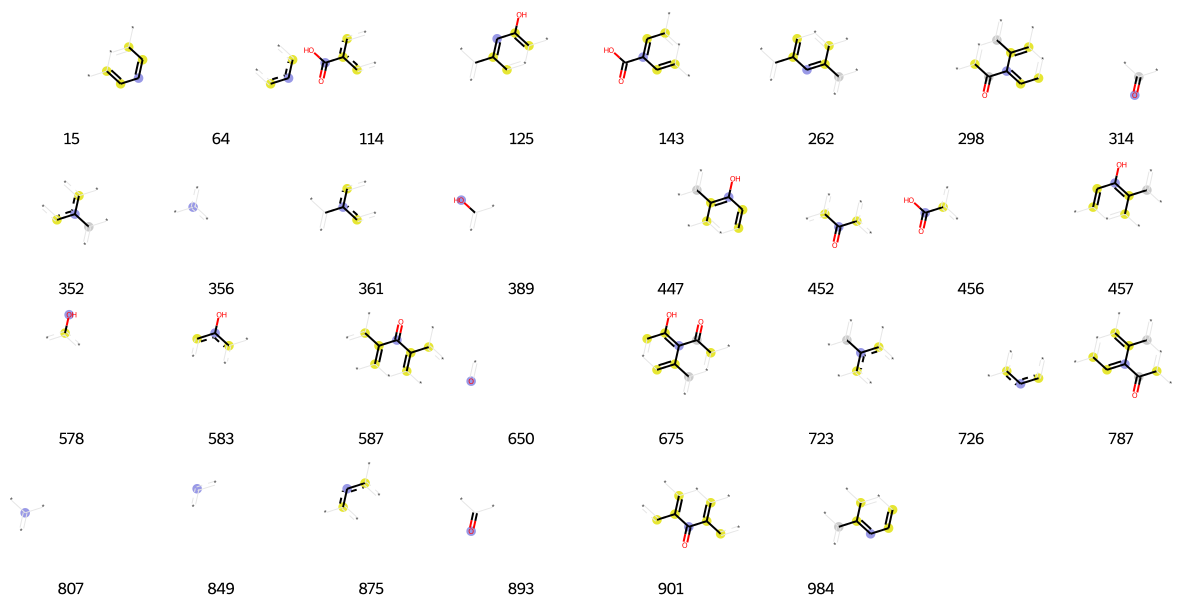

In [11559]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [11560]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


[1,
 80,
 87,
 115,
 147,
 162,
 336,
 389,
 403,
 650,
 725,
 786,
 807,
 815,
 820,
 825,
 836,
 881,
 893,
 905,
 979,
 1012]

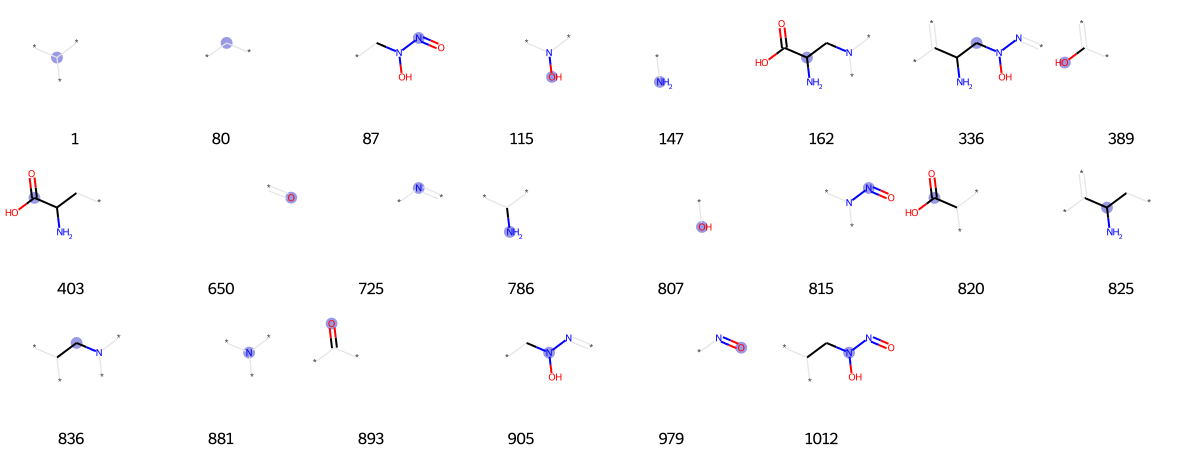

In [11561]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [11562]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[1,
 33,
 45,
 50,
 60,
 80,
 136,
 157,
 283,
 314,
 322,
 323,
 333,
 341,
 356,
 371,
 378,
 384,
 428,
 471,
 477,
 550,
 561,
 591,
 598,
 599,
 636,
 639,
 650,
 674,
 695,
 704,
 718,
 726,
 780,
 788,
 829,
 831,
 849,
 862,
 863,
 875,
 894,
 896,
 906,
 915,
 935,
 974,
 997]

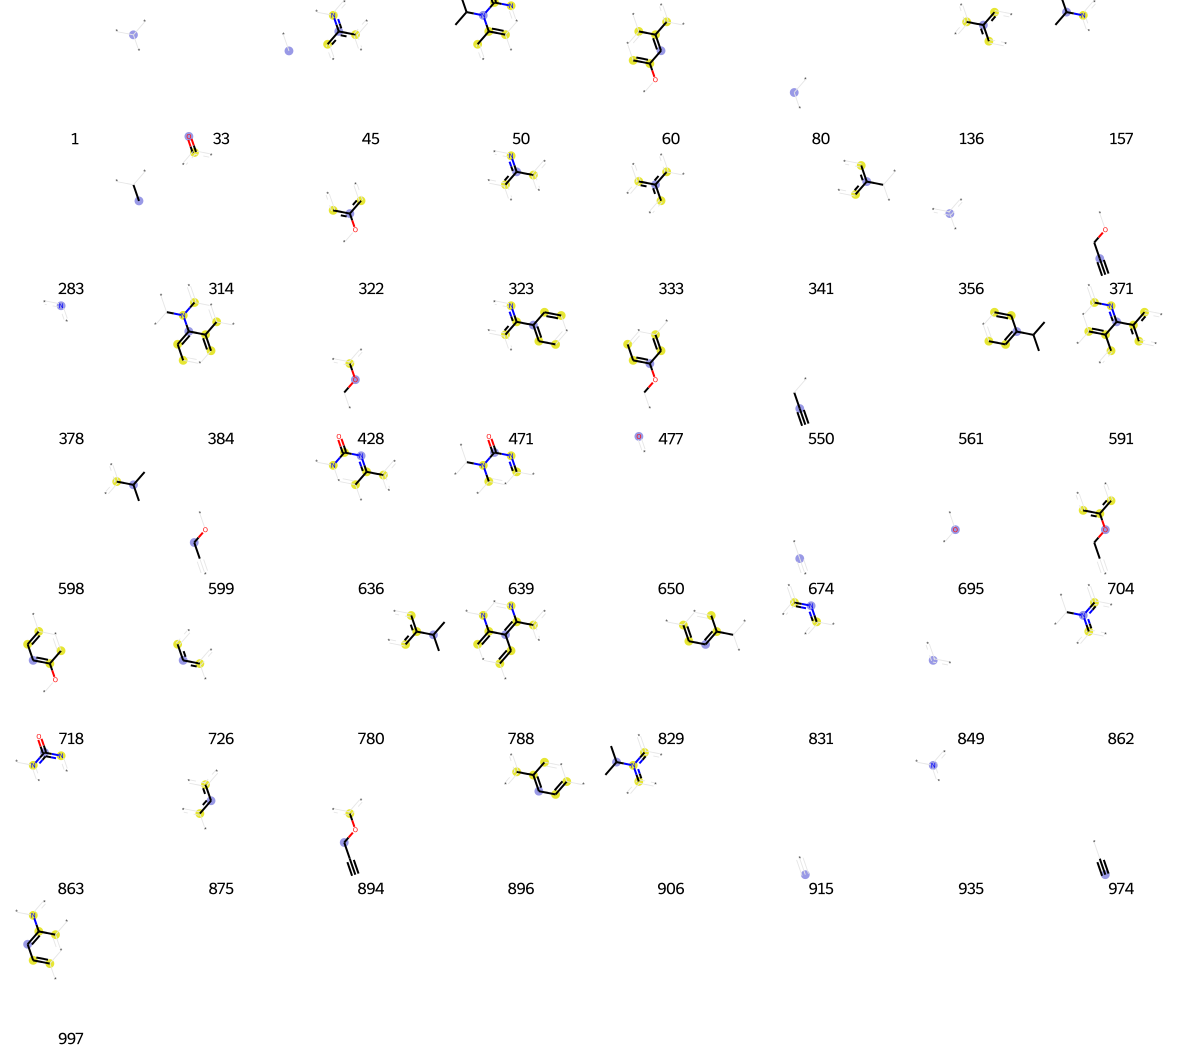

In [11563]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [11564]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[1,
 15,
 33,
 46,
 47,
 64,
 75,
 89,
 105,
 124,
 128,
 140,
 157,
 158,
 196,
 209,
 219,
 271,
 281,
 283,
 301,
 315,
 350,
 356,
 367,
 378,
 380,
 414,
 427,
 428,
 443,
 464,
 486,
 502,
 636,
 650,
 664,
 670,
 698,
 699,
 726,
 783,
 792,
 807,
 808,
 809,
 816,
 827,
 829,
 831,
 847,
 849,
 872,
 875,
 879,
 893,
 904,
 905,
 926,
 932,
 935,
 967,
 976,
 980,
 1019]

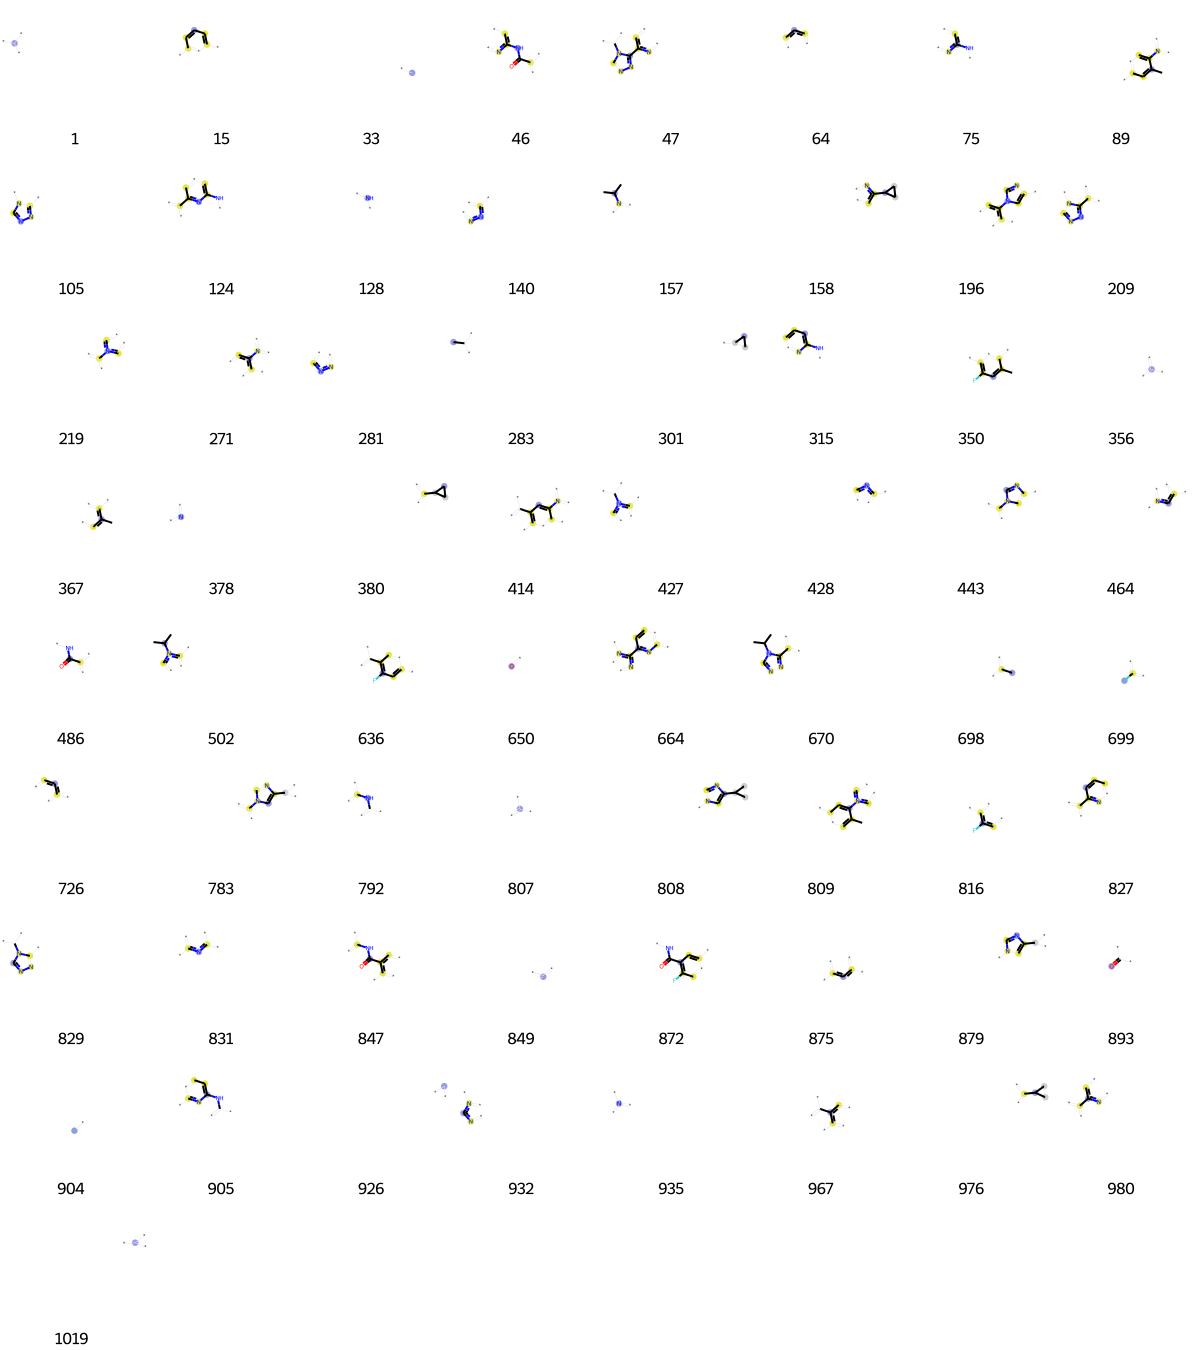

In [11565]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [11566]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[63,
 64,
 80,
 99,
 147,
 157,
 162,
 175,
 203,
 240,
 277,
 333,
 356,
 378,
 433,
 460,
 488,
 549,
 675,
 700,
 726,
 751,
 831,
 849,
 885]

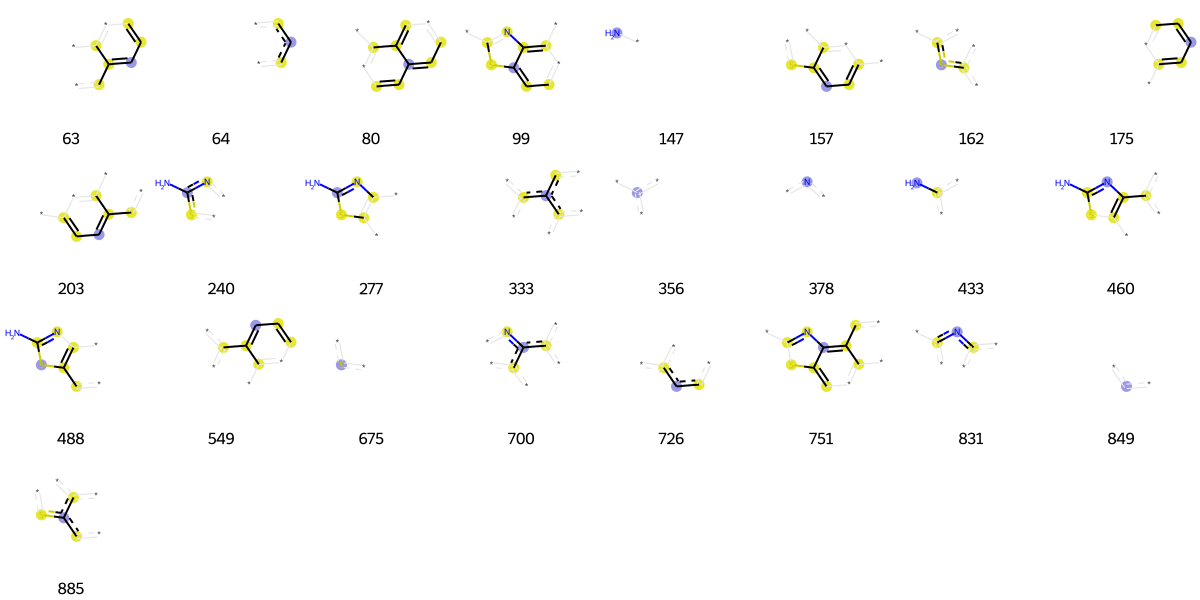

In [11567]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [11568]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[1,
 29,
 33,
 36,
 119,
 130,
 149,
 162,
 210,
 250,
 283,
 287,
 303,
 333,
 356,
 378,
 395,
 407,
 428,
 448,
 456,
 484,
 489,
 511,
 528,
 583,
 595,
 598,
 620,
 655,
 675,
 730,
 754,
 759,
 760,
 786,
 792,
 849,
 875,
 881,
 926,
 935,
 978,
 985]

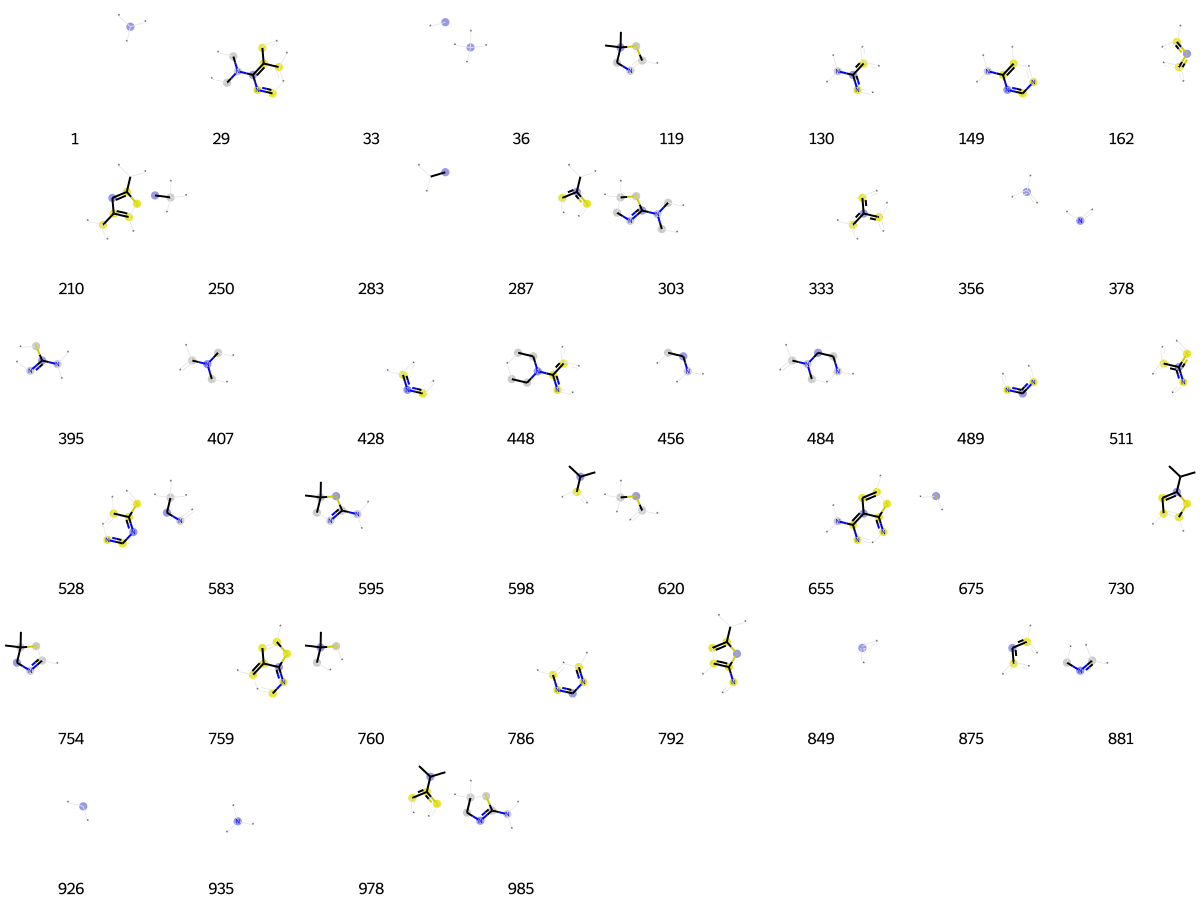

In [11569]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [11570]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[2,
 4,
 10,
 13,
 33,
 80,
 102,
 121,
 294,
 322,
 356,
 361,
 398,
 427,
 428,
 456,
 458,
 533,
 540,
 591,
 594,
 650,
 669,
 673,
 695,
 718,
 726,
 767,
 794,
 807,
 849,
 873,
 887,
 893,
 926,
 935,
 974]

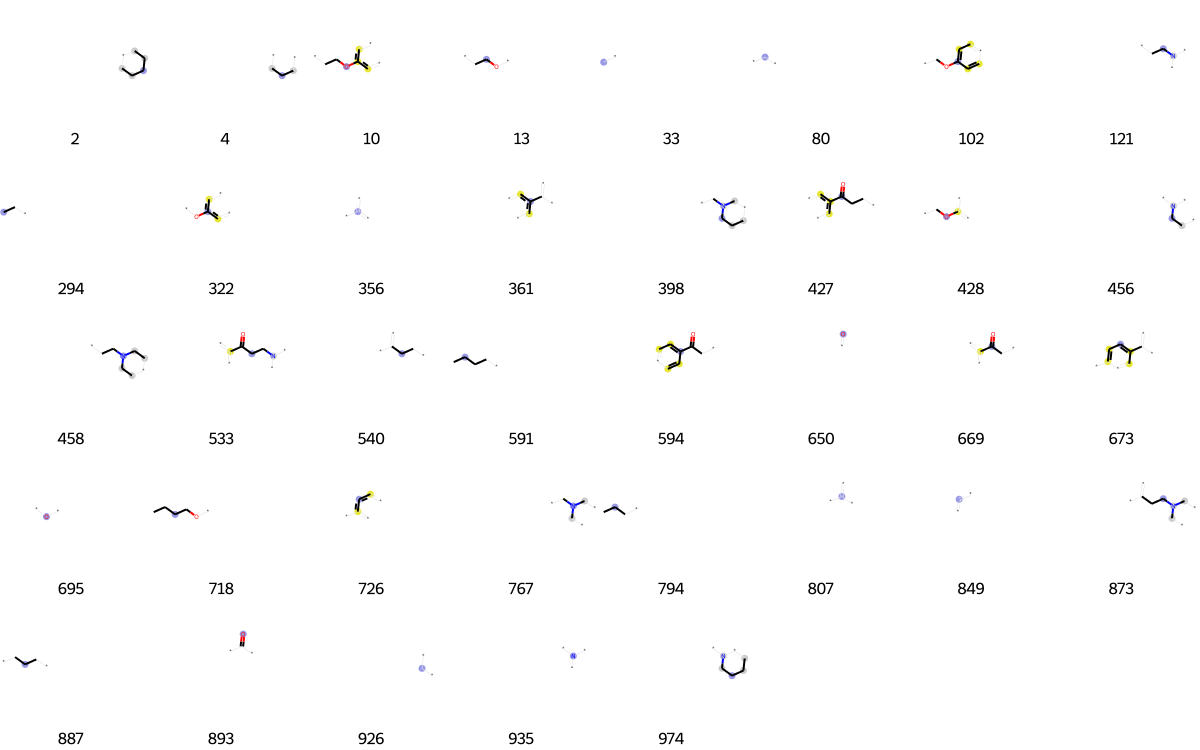

In [11571]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [11572]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[32,
 33,
 43,
 58,
 114,
 128,
 163,
 167,
 188,
 200,
 243,
 262,
 271,
 301,
 342,
 356,
 378,
 406,
 419,
 428,
 429,
 441,
 456,
 458,
 474,
 491,
 511,
 523,
 544,
 550,
 555,
 558,
 561,
 584,
 593,
 611,
 619,
 656,
 659,
 665,
 673,
 678,
 702,
 708,
 711,
 739,
 793,
 809,
 830,
 831,
 849,
 886,
 890,
 899,
 904,
 926,
 935,
 949,
 1012,
 1019]

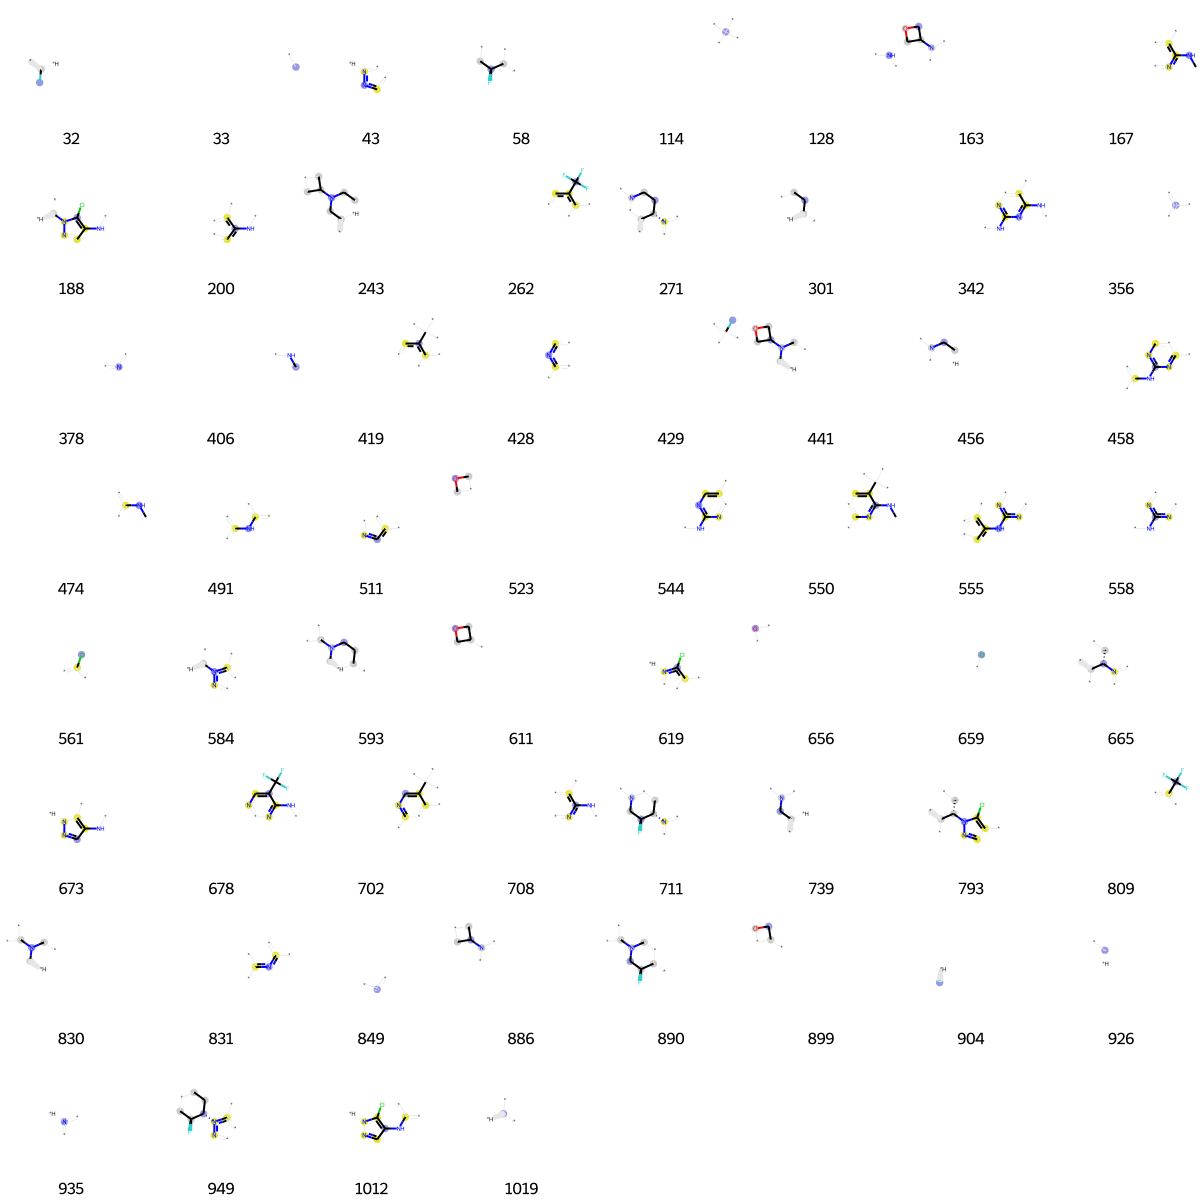

In [11573]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [11574]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[9,
 71,
 75,
 80,
 147,
 152,
 194,
 209,
 210,
 222,
 229,
 233,
 356,
 378,
 428,
 433,
 435,
 454,
 463,
 489,
 492,
 519,
 548,
 577,
 610,
 656,
 672,
 700,
 740,
 786,
 807,
 820,
 849,
 897,
 932,
 935,
 962,
 1019]

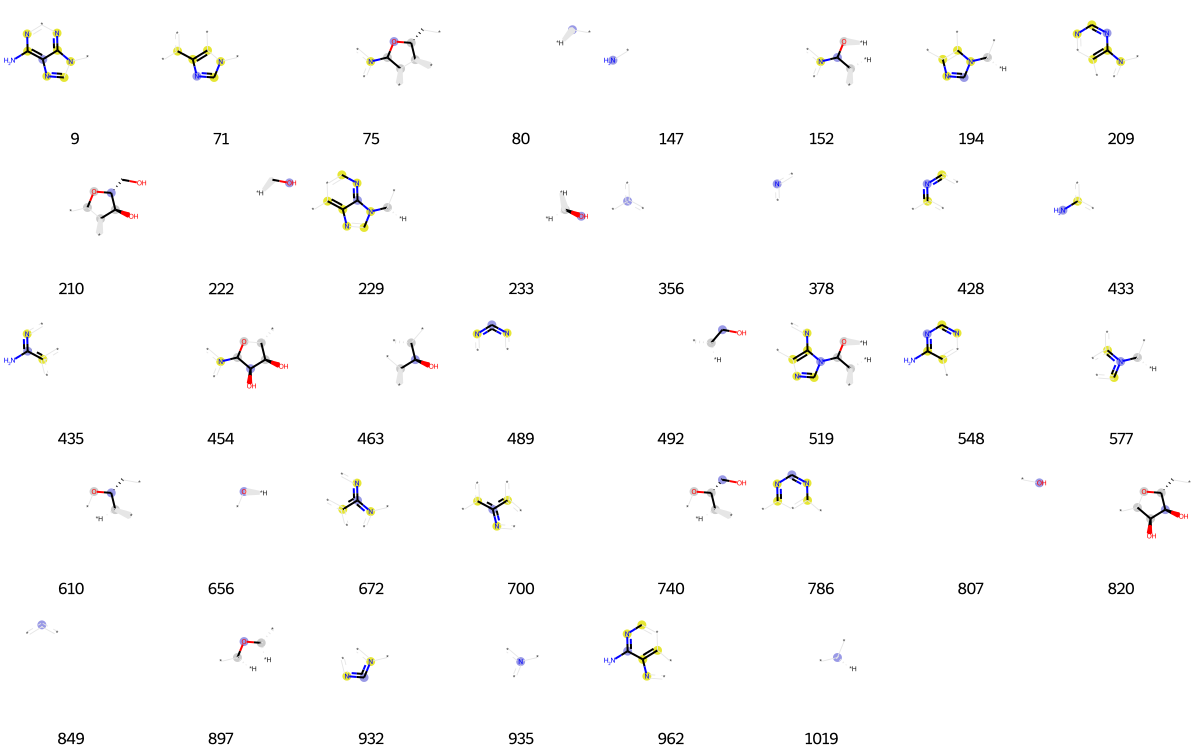

In [11575]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [11576]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 19,
 33,
 43,
 63,
 64,
 72,
 73,
 115,
 116,
 121,
 136,
 140,
 202,
 231,
 275,
 279,
 301,
 327,
 356,
 378,
 389,
 399,
 412,
 425,
 428,
 448,
 464,
 511,
 552,
 613,
 726,
 738,
 747,
 811,
 819,
 831,
 834,
 842,
 849,
 859,
 873,
 874,
 875,
 885,
 922,
 926,
 932,
 935,
 961,
 980]

In [11577]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[15,
 33,
 39,
 64,
 114,
 125,
 128,
 135,
 136,
 145,
 174,
 191,
 203,
 206,
 217,
 222,
 252,
 285,
 317,
 322,
 346,
 352,
 356,
 378,
 385,
 386,
 407,
 418,
 423,
 428,
 429,
 486,
 511,
 527,
 548,
 635,
 645,
 650,
 656,
 695,
 698,
 718,
 726,
 739,
 792,
 807,
 843,
 847,
 849,
 860,
 887,
 893,
 896,
 897,
 904,
 926,
 935,
 954,
 967,
 984,
 1019]

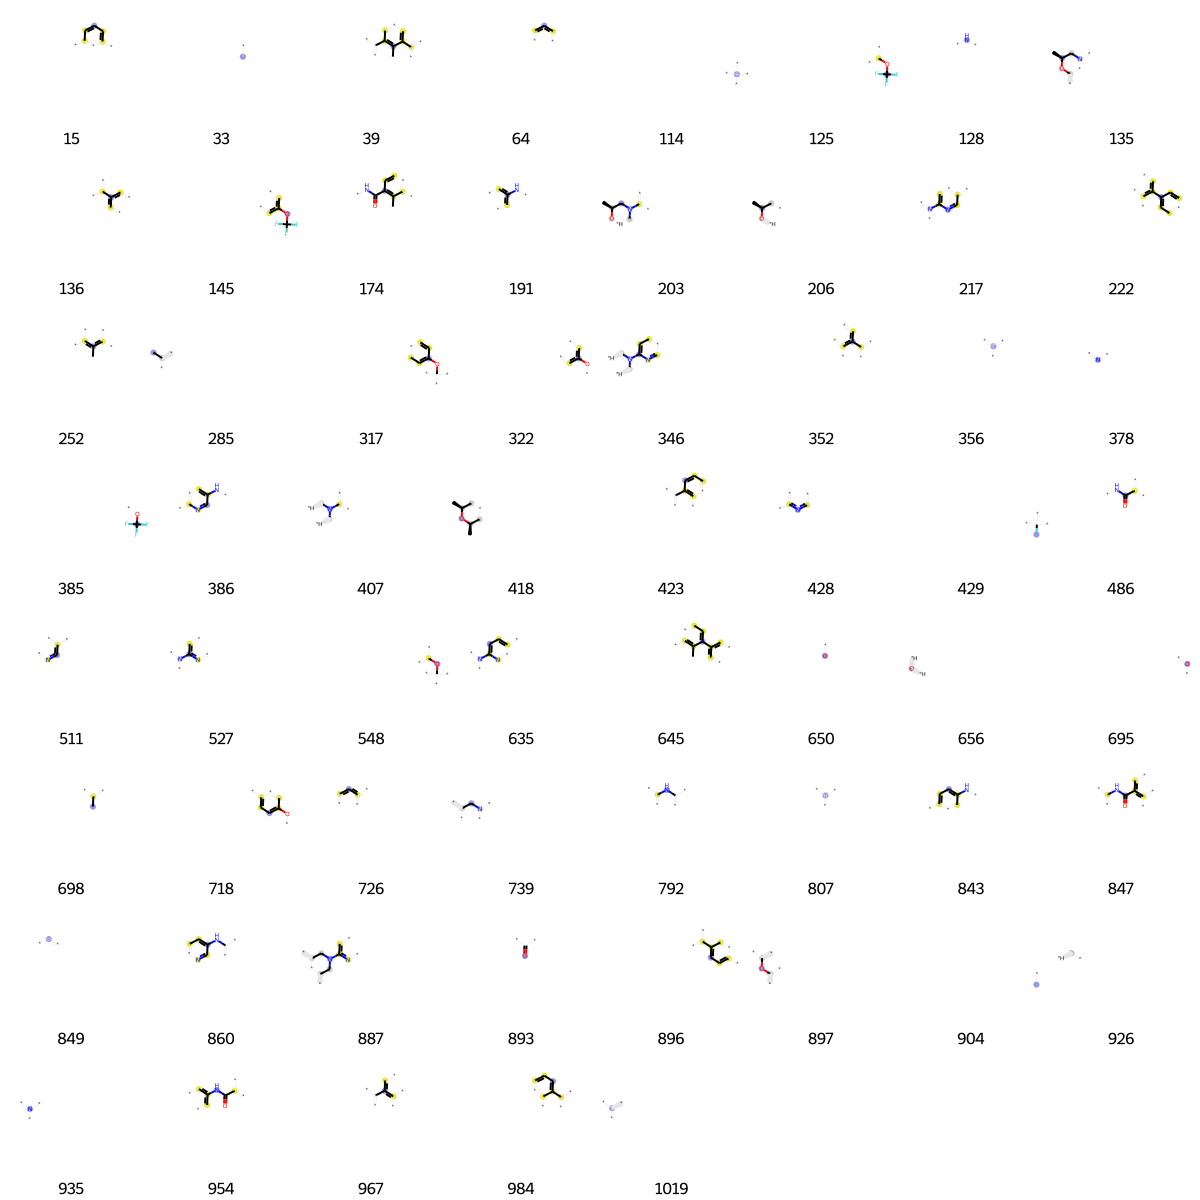

In [11578]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [11579]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[17,
 33,
 36,
 42,
 106,
 114,
 138,
 250,
 342,
 353,
 356,
 361,
 367,
 389,
 456,
 469,
 569,
 608,
 650,
 662,
 673,
 698,
 718,
 725,
 726,
 807,
 849,
 875,
 893,
 926,
 953,
 956,
 967,
 1022]

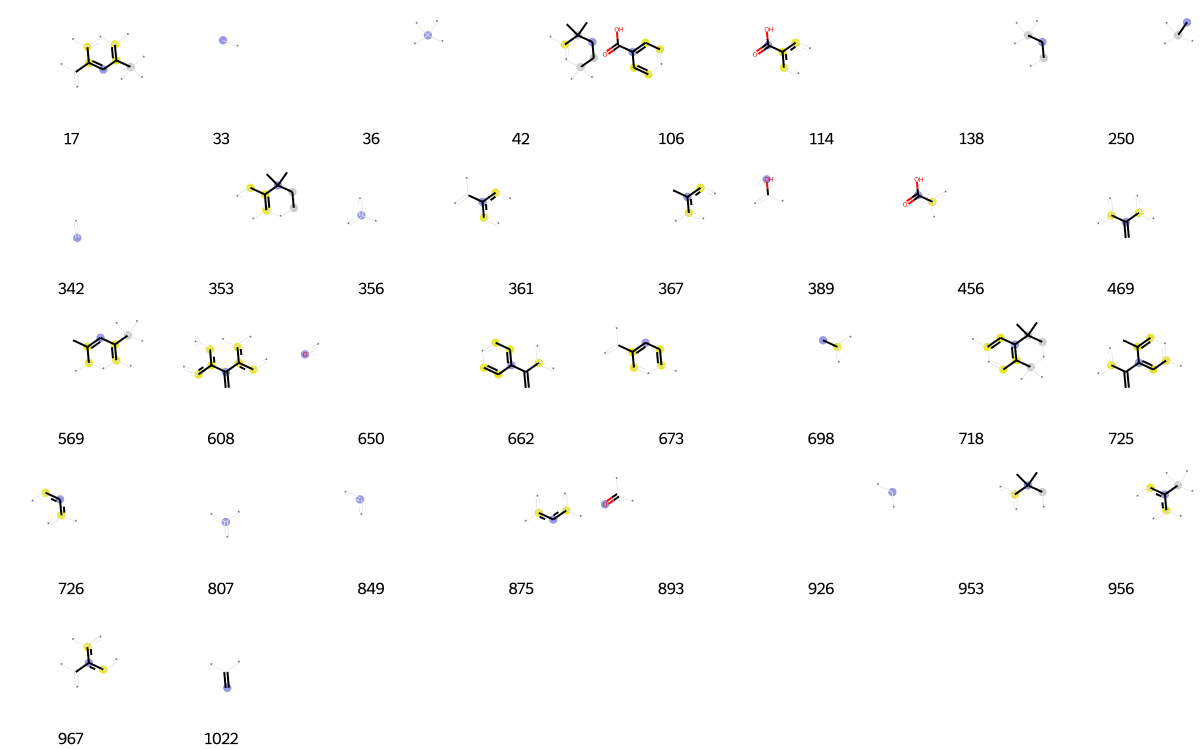

In [11580]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [11581]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[4,
 33,
 114,
 158,
 191,
 314,
 322,
 356,
 361,
 363,
 372,
 456,
 459,
 480,
 487,
 512,
 515,
 650,
 673,
 695,
 714,
 718,
 726,
 781,
 798,
 807,
 831,
 841,
 849,
 893,
 926,
 935]

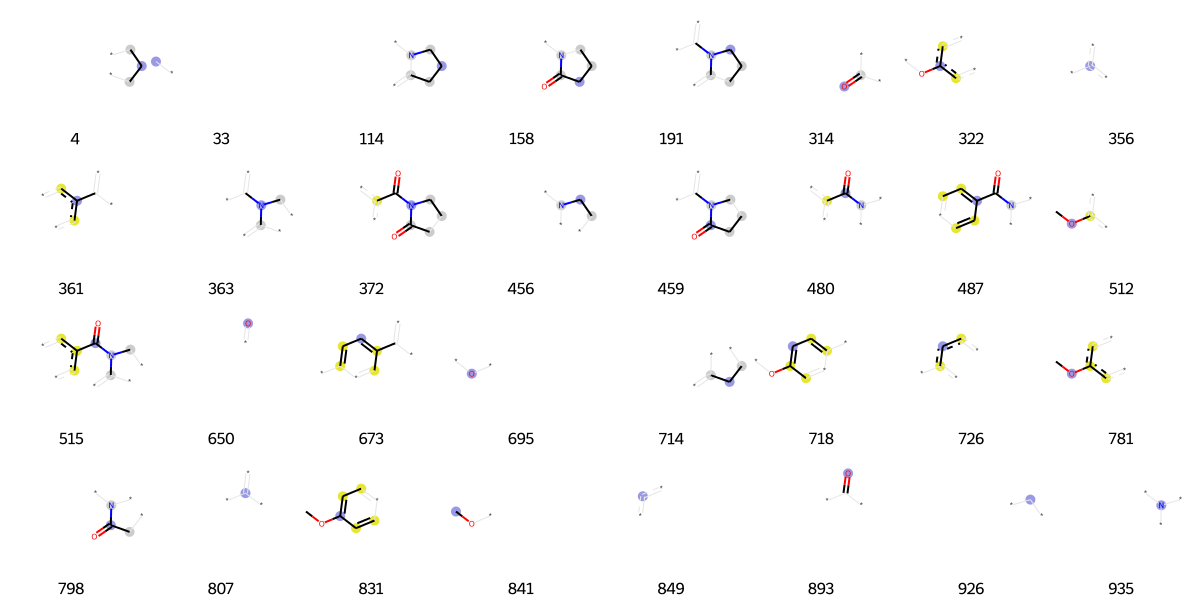

In [11582]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [11583]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[14,
 33,
 53,
 114,
 116,
 202,
 230,
 261,
 315,
 356,
 391,
 392,
 419,
 532,
 578,
 744,
 807,
 811,
 849,
 875,
 975]

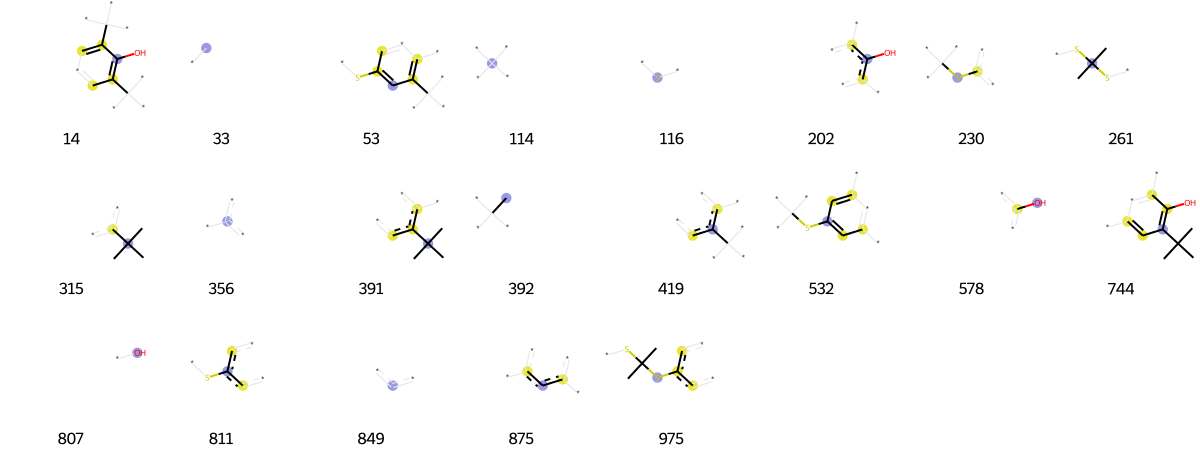

In [11584]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [11585]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[3,
 4,
 33,
 53,
 64,
 128,
 139,
 159,
 175,
 191,
 246,
 271,
 301,
 310,
 317,
 356,
 361,
 363,
 367,
 371,
 423,
 446,
 456,
 480,
 486,
 487,
 515,
 623,
 650,
 673,
 698,
 704,
 726,
 735,
 792,
 805,
 807,
 841,
 843,
 847,
 849,
 871,
 881,
 893,
 926,
 927,
 935,
 954,
 967,
 975,
 1019]

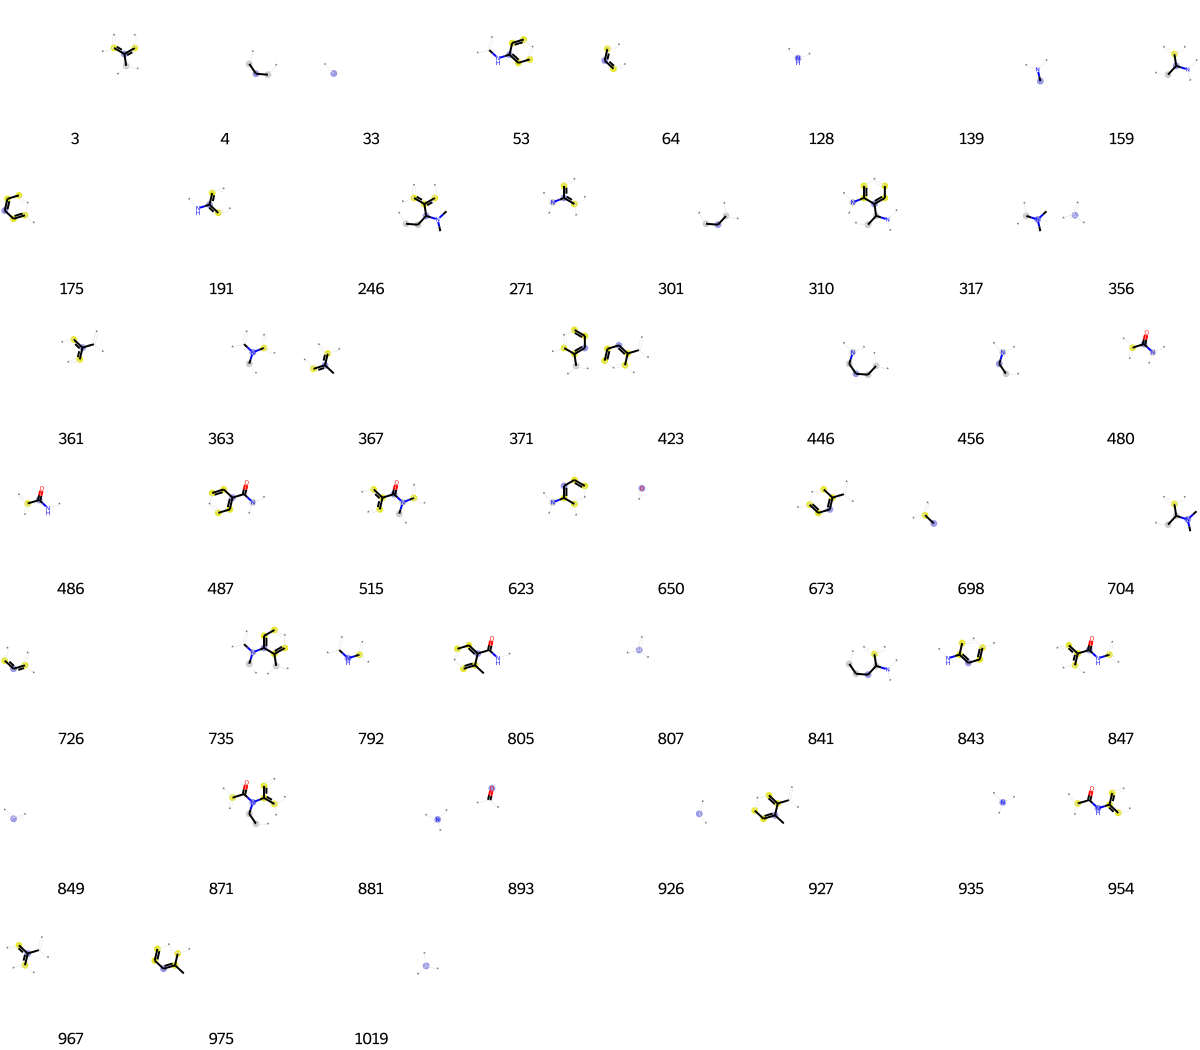

In [11586]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [11587]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[14,
 15,
 20,
 33,
 35,
 36,
 64,
 75,
 77,
 80,
 101,
 121,
 128,
 136,
 199,
 200,
 207,
 212,
 218,
 222,
 229,
 233,
 255,
 270,
 271,
 301,
 314,
 352,
 356,
 378,
 380,
 385,
 400,
 407,
 428,
 449,
 456,
 464,
 484,
 491,
 504,
 511,
 512,
 564,
 583,
 616,
 623,
 627,
 650,
 687,
 699,
 722,
 726,
 761,
 797,
 800,
 801,
 807,
 816,
 831,
 837,
 849,
 851,
 852,
 875,
 904,
 923,
 926,
 931,
 935,
 955,
 960,
 967,
 976,
 984,
 987,
 1010,
 1019]

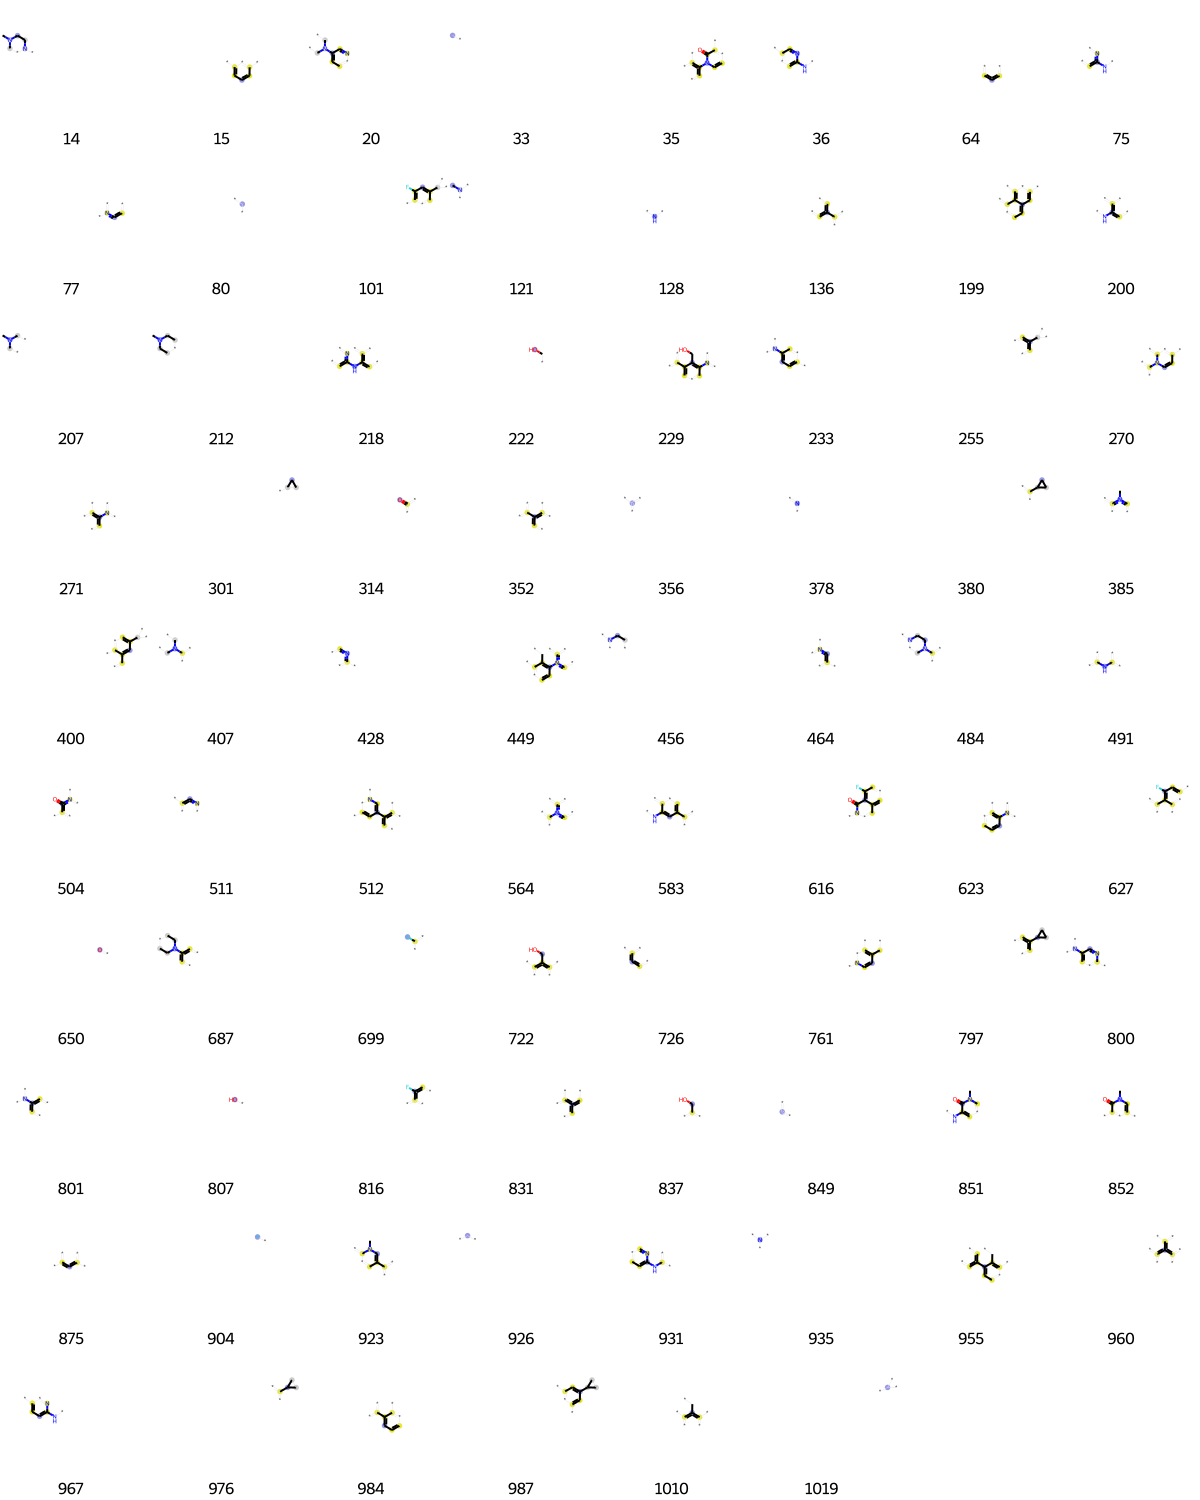

In [11588]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [11589]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[33,
 36,
 50,
 80,
 86,
 138,
 145,
 155,
 175,
 184,
 222,
 233,
 240,
 250,
 267,
 280,
 301,
 308,
 347,
 356,
 389,
 409,
 412,
 418,
 453,
 463,
 478,
 533,
 555,
 598,
 600,
 650,
 679,
 715,
 732,
 757,
 760,
 781,
 788,
 792,
 807,
 849,
 857,
 889,
 893,
 926,
 927,
 938,
 981,
 1010,
 1019]

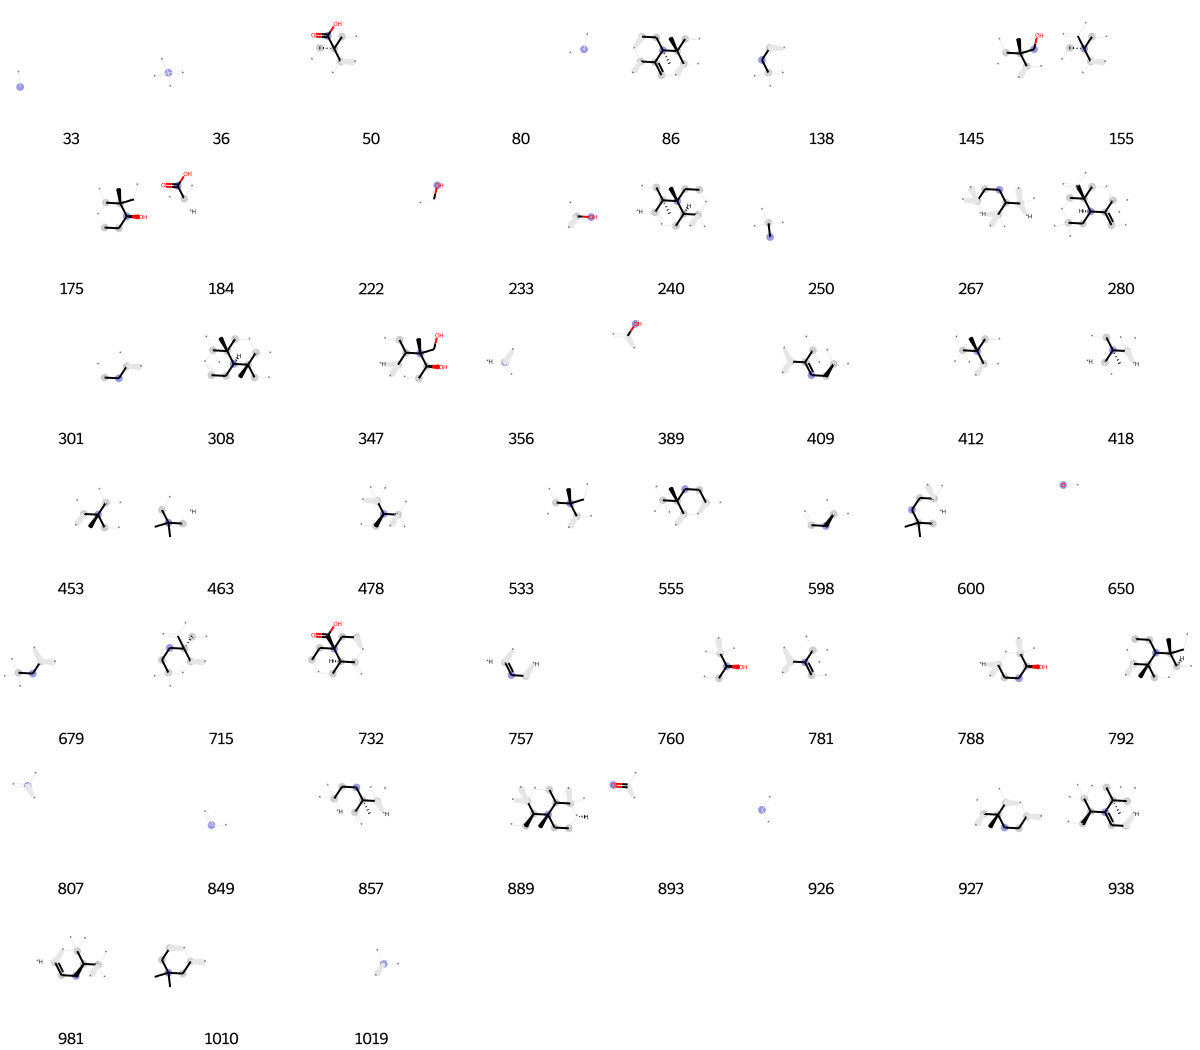

In [11590]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [11591]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[4,
 33,
 45,
 64,
 73,
 80,
 83,
 116,
 121,
 128,
 136,
 175,
 193,
 200,
 222,
 242,
 261,
 270,
 289,
 301,
 341,
 352,
 354,
 356,
 357,
 378,
 384,
 389,
 410,
 446,
 456,
 516,
 531,
 564,
 624,
 647,
 650,
 668,
 672,
 689,
 717,
 726,
 729,
 736,
 747,
 792,
 807,
 831,
 849,
 873,
 893,
 926,
 935,
 954,
 984,
 1009,
 1019]

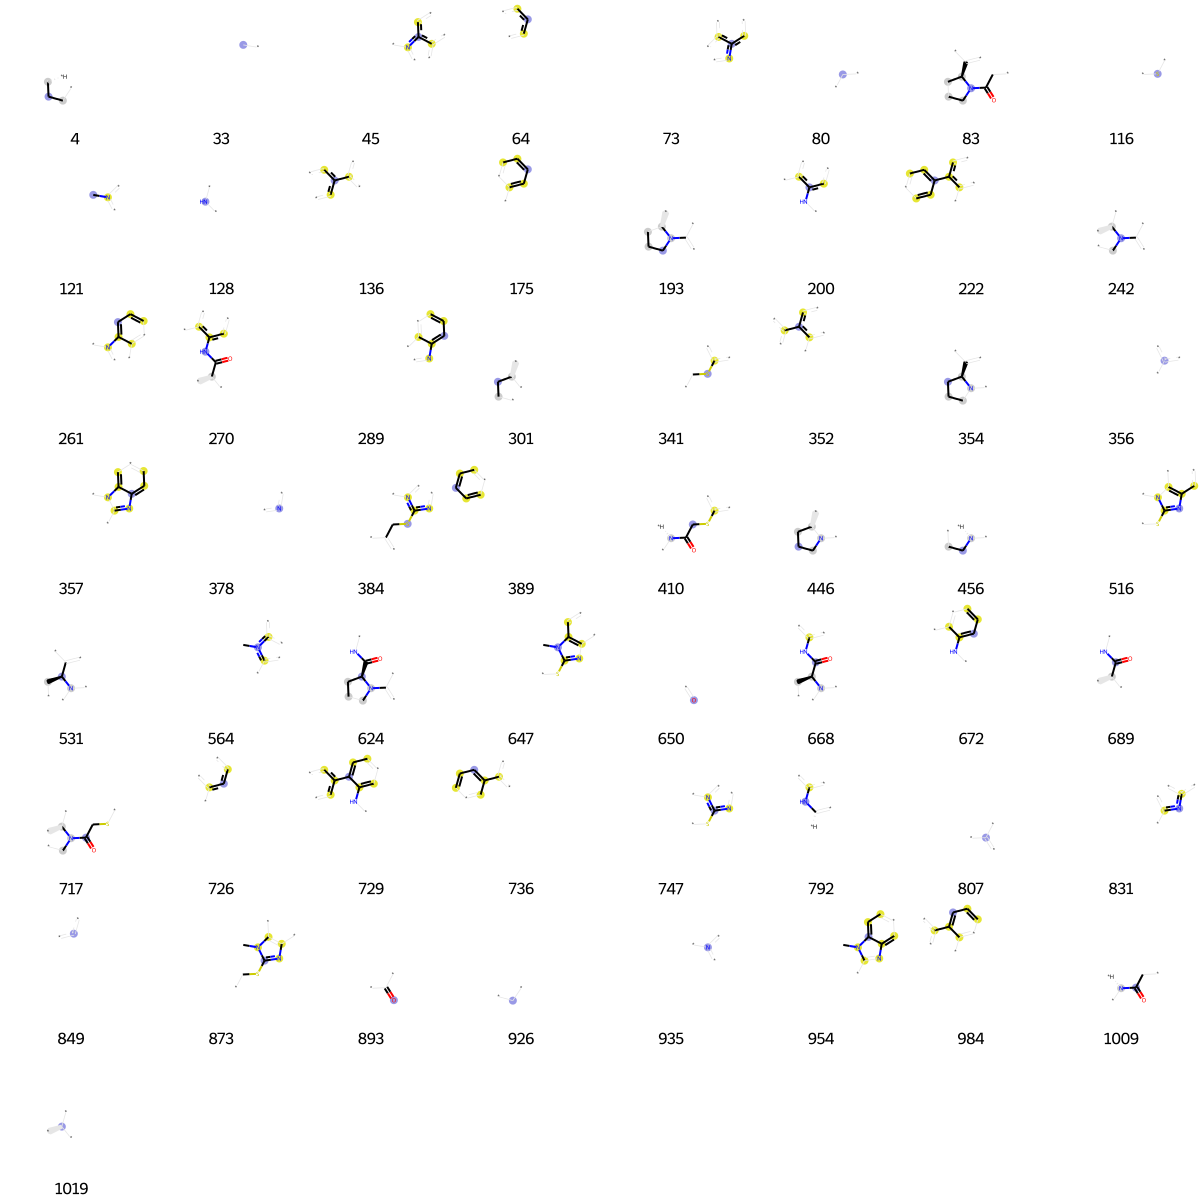

In [11592]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [11593]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[33,
 80,
 101,
 114,
 233,
 284,
 342,
 392,
 401,
 461,
 479,
 550,
 558,
 621,
 694,
 698,
 807,
 884,
 906,
 973,
 975,
 1017]

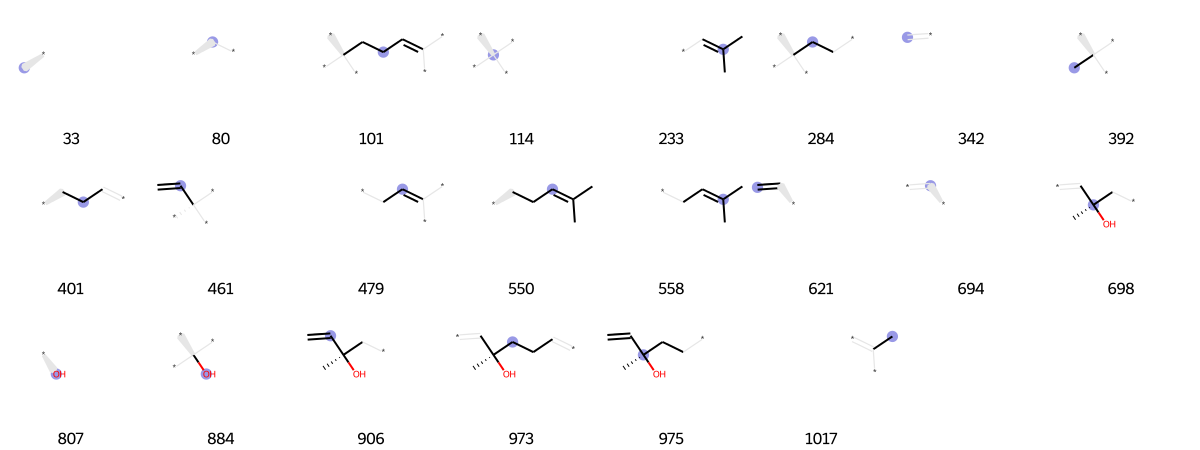

In [11594]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [11595]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[15,
 29,
 36,
 64,
 74,
 80,
 90,
 119,
 130,
 138,
 150,
 175,
 212,
 214,
 231,
 248,
 264,
 270,
 275,
 301,
 311,
 333,
 356,
 361,
 389,
 451,
 456,
 470,
 474,
 549,
 556,
 578,
 583,
 632,
 647,
 649,
 656,
 682,
 721,
 726,
 736,
 737,
 750,
 759,
 784,
 791,
 807,
 849,
 889,
 908,
 926,
 935,
 940,
 948,
 956,
 978,
 998,
 1019,
 1021]

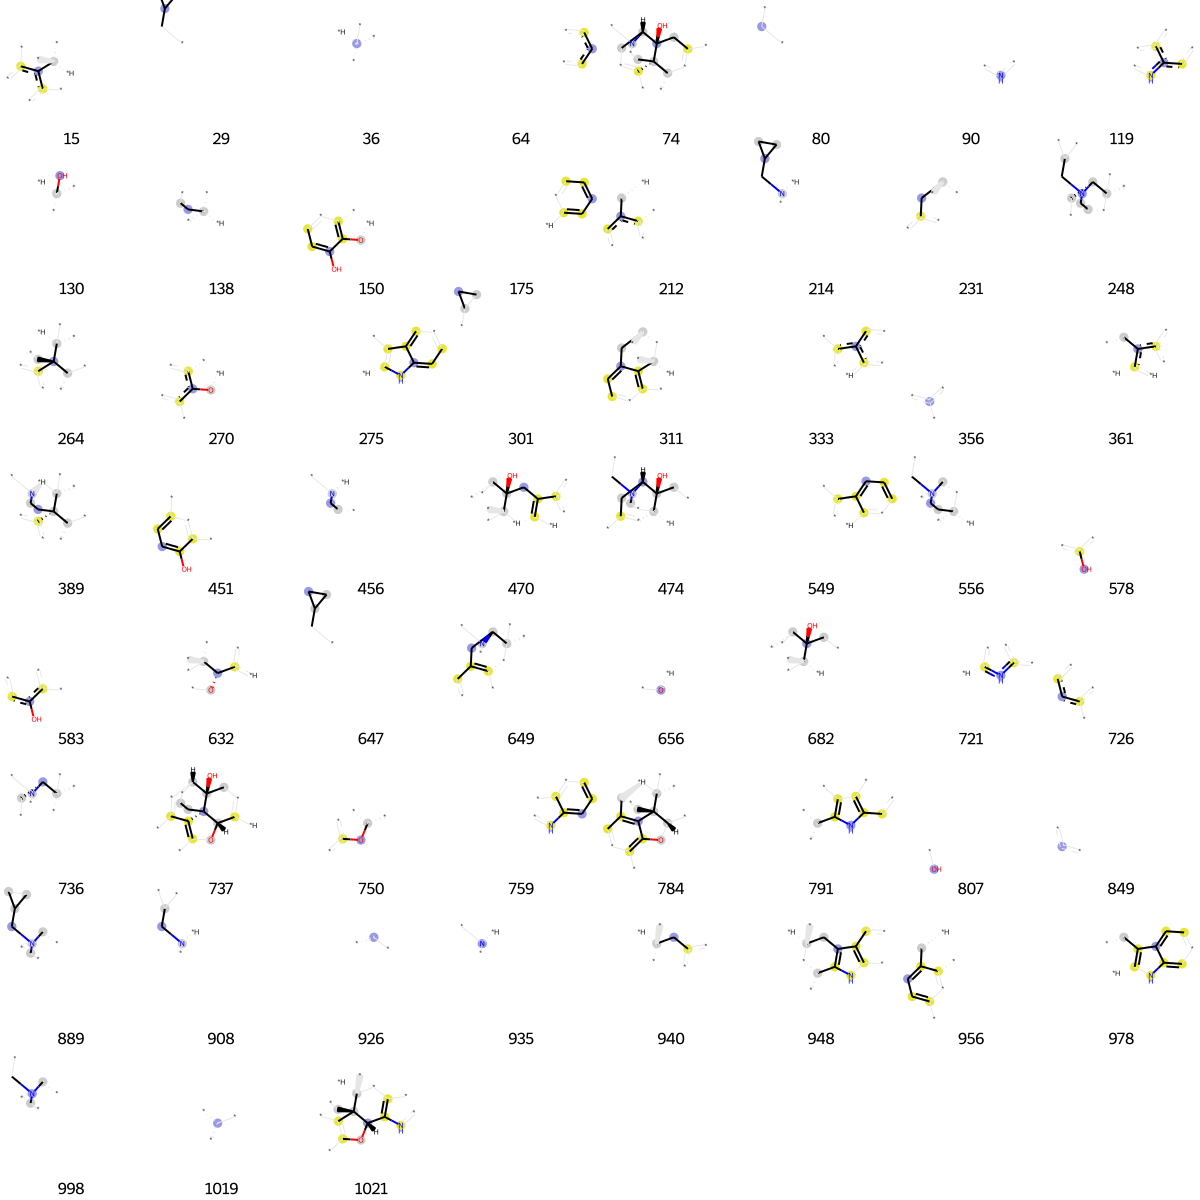

In [11596]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [11597]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[1,
 33,
 46,
 77,
 102,
 114,
 216,
 232,
 270,
 322,
 343,
 356,
 373,
 378,
 392,
 493,
 540,
 561,
 579,
 630,
 649,
 650,
 659,
 664,
 695,
 718,
 726,
 792,
 799,
 807,
 816,
 842,
 843,
 849,
 871,
 893,
 932,
 935,
 968]

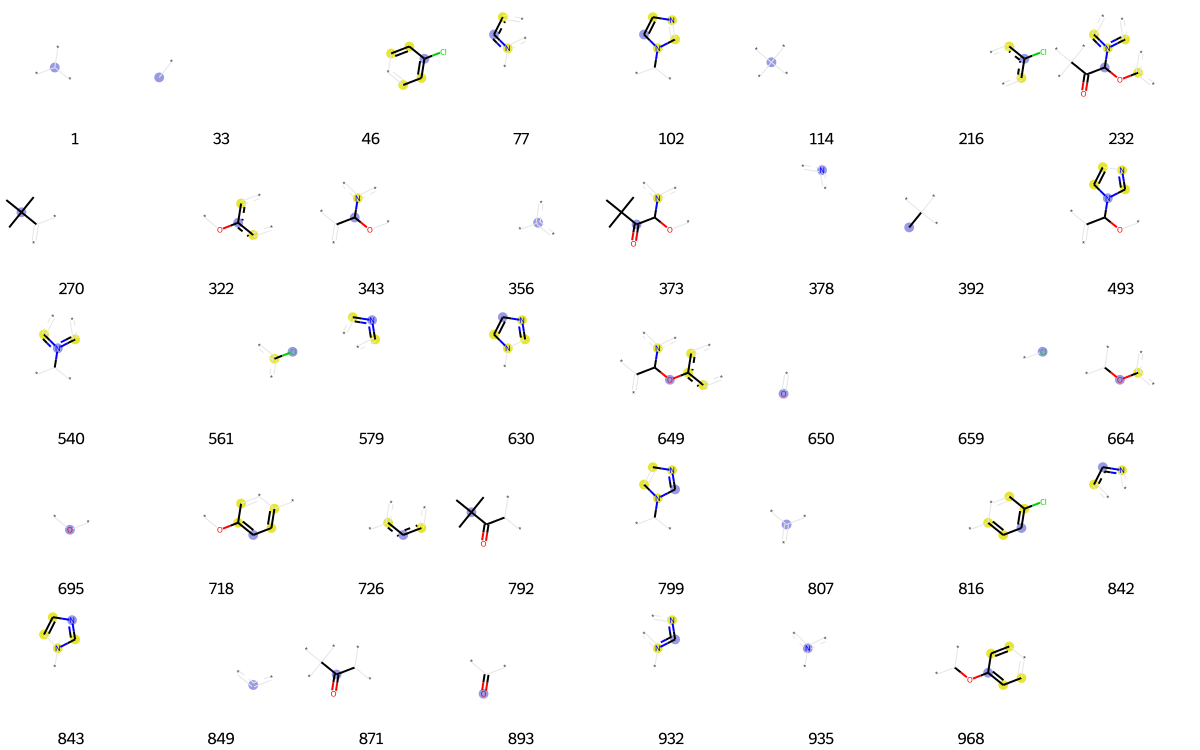

In [11598]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [11599]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[1,
 33,
 36,
 69,
 78,
 80,
 119,
 125,
 128,
 142,
 147,
 252,
 259,
 260,
 283,
 294,
 314,
 334,
 356,
 364,
 406,
 412,
 420,
 458,
 488,
 523,
 591,
 610,
 650,
 656,
 680,
 694,
 695,
 736,
 739,
 750,
 759,
 774,
 794,
 807,
 823,
 832,
 887,
 893,
 932,
 941,
 942,
 968,
 976,
 1004,
 1019,
 1023]

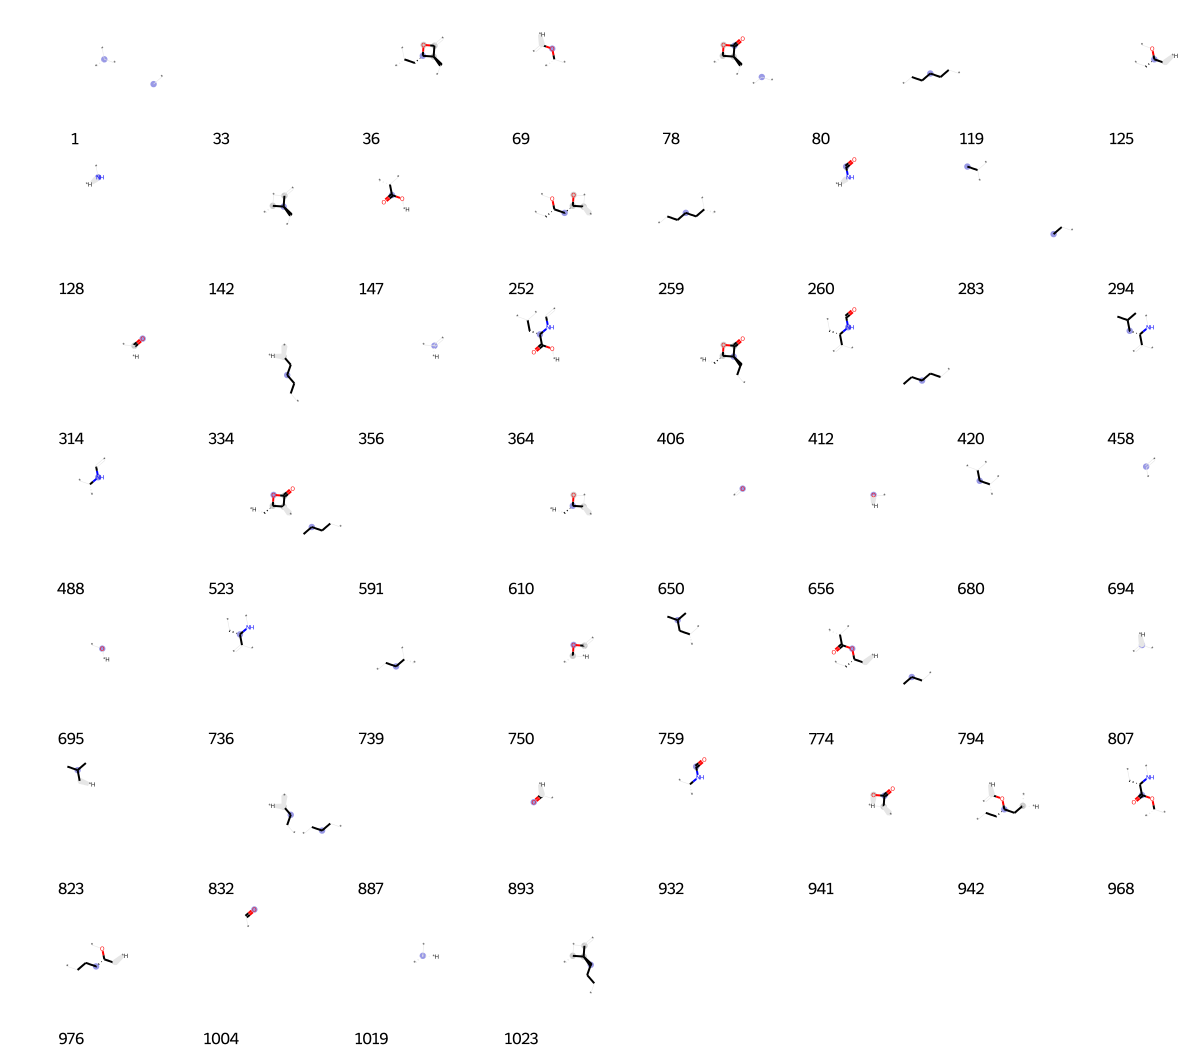

In [11600]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [11601]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[1,
 4,
 15,
 33,
 63,
 64,
 80,
 88,
 118,
 128,
 169,
 175,
 227,
 283,
 329,
 333,
 356,
 386,
 428,
 430,
 549,
 550,
 606,
 658,
 695,
 726,
 782,
 807,
 831,
 849,
 882,
 946,
 1006,
 1014]

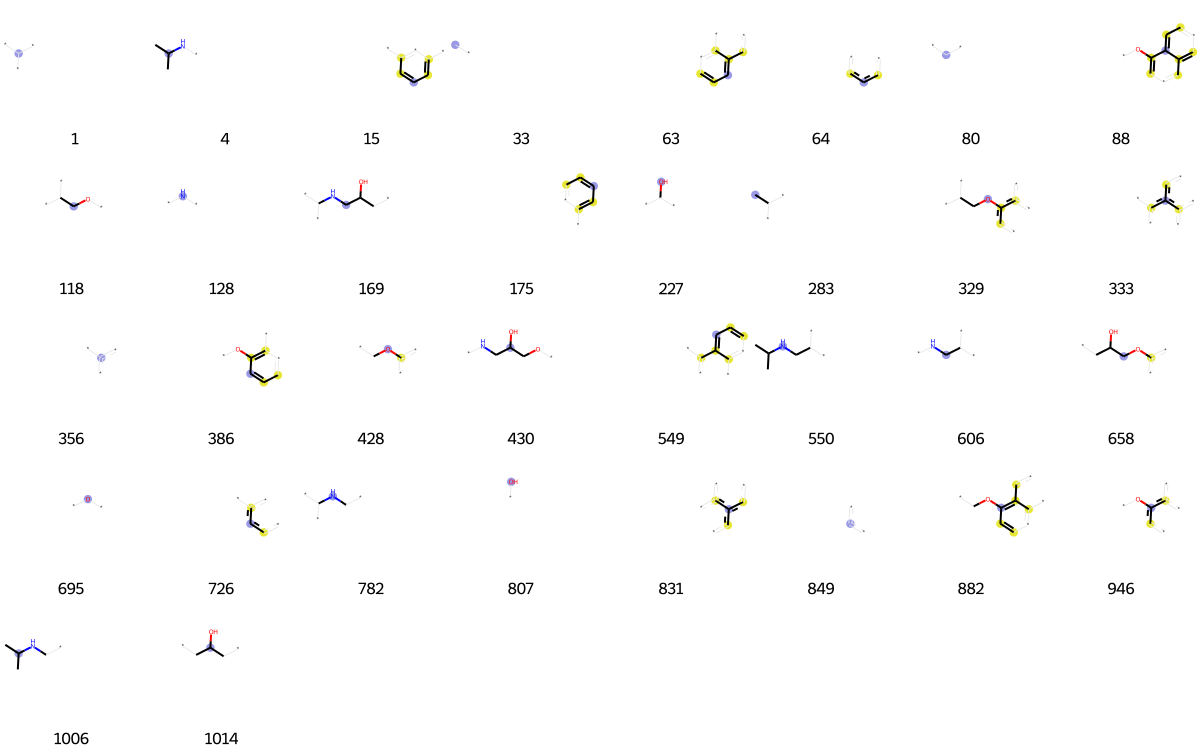

In [11602]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [11603]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[33,
 43,
 80,
 81,
 121,
 214,
 230,
 231,
 237,
 267,
 271,
 294,
 314,
 333,
 356,
 366,
 378,
 381,
 407,
 417,
 428,
 456,
 504,
 511,
 523,
 531,
 629,
 641,
 650,
 656,
 695,
 849,
 858,
 926,
 935,
 950,
 1014]

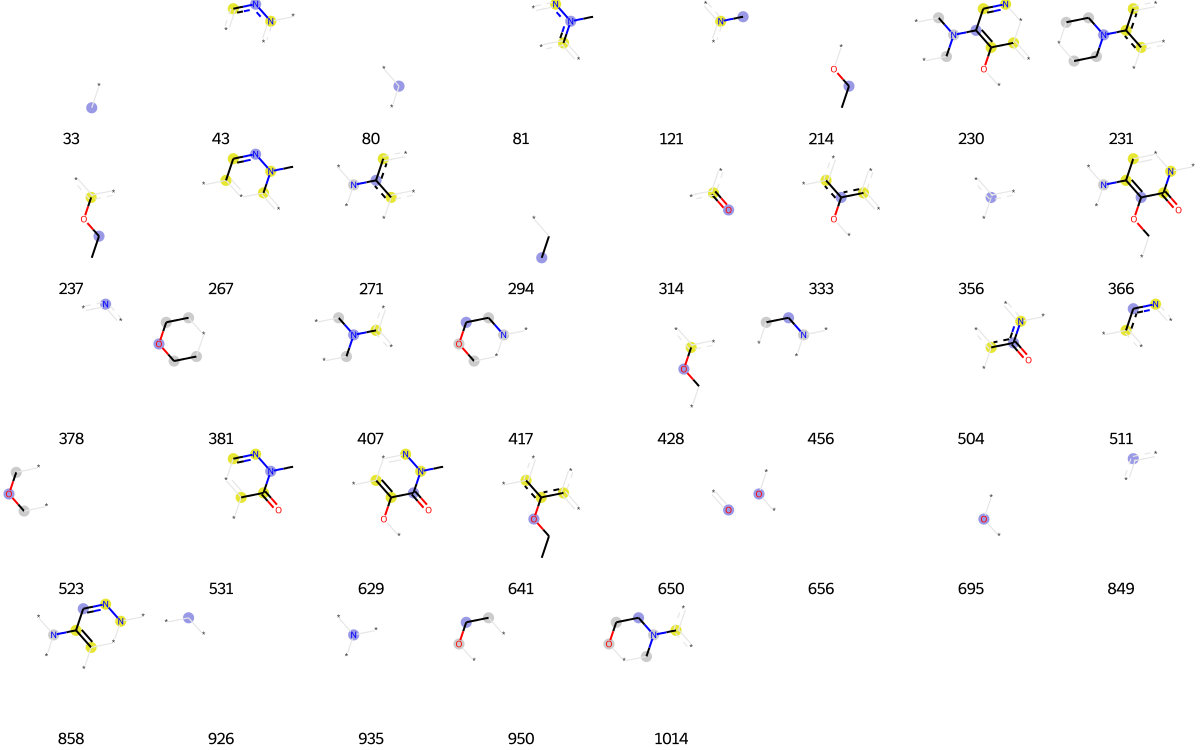

In [11604]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [11605]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[16,
 29,
 33,
 36,
 53,
 80,
 117,
 128,
 130,
 140,
 144,
 147,
 178,
 188,
 210,
 222,
 233,
 285,
 299,
 349,
 350,
 351,
 357,
 406,
 408,
 436,
 452,
 463,
 492,
 503,
 534,
 553,
 576,
 577,
 585,
 590,
 592,
 600,
 610,
 644,
 650,
 655,
 656,
 657,
 694,
 695,
 697,
 725,
 740,
 807,
 820,
 843,
 881,
 882,
 897,
 926,
 953,
 967,
 993,
 1004,
 1019]

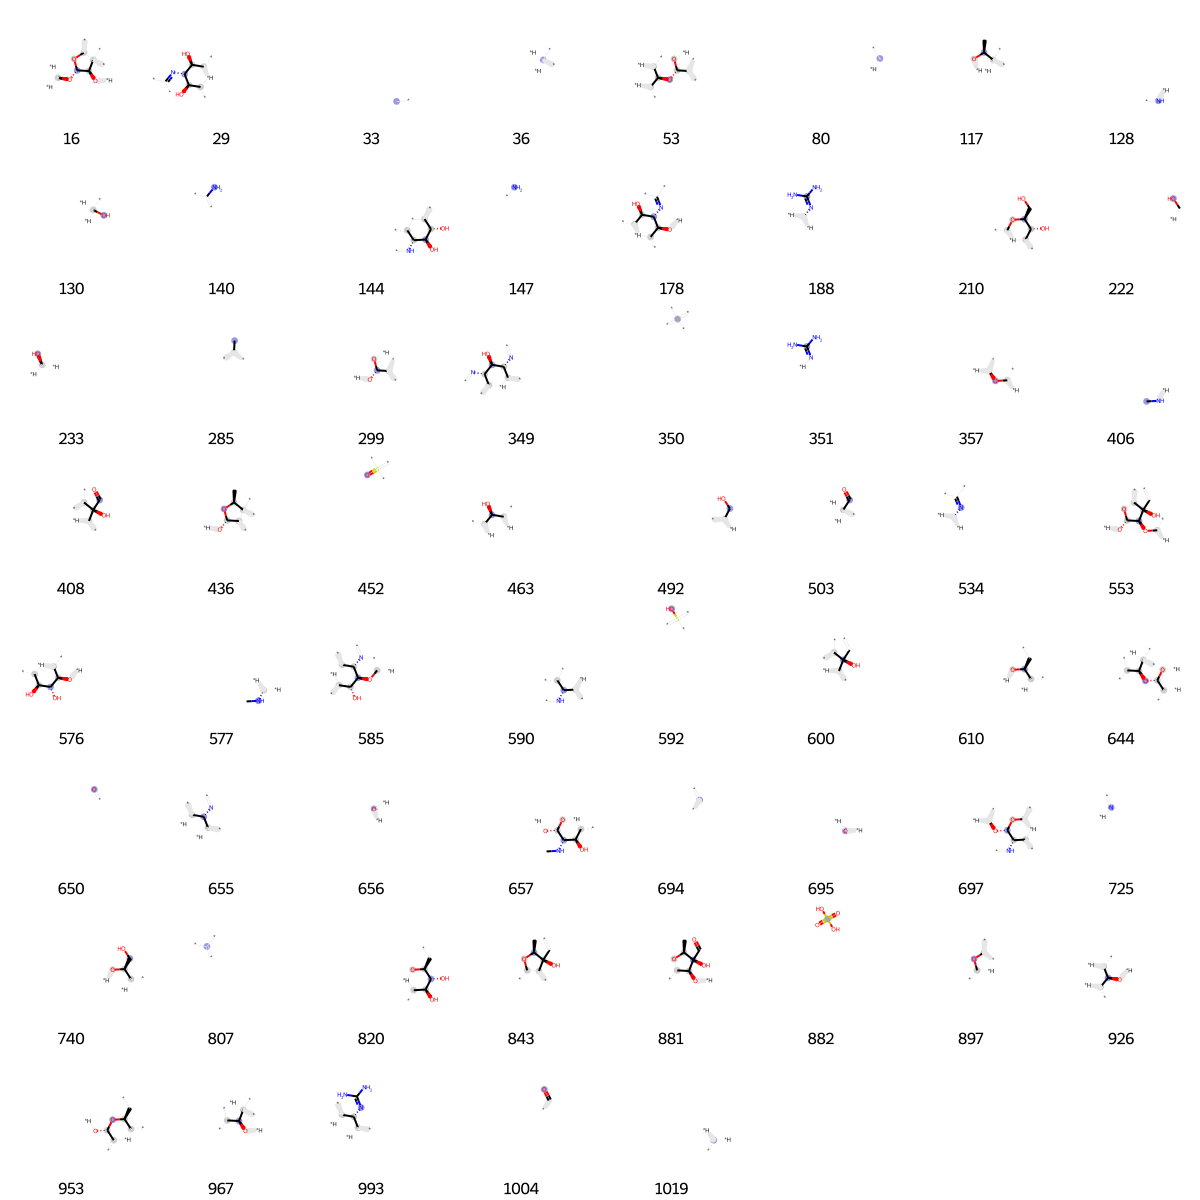

In [11606]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [11607]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[1,
 4,
 33,
 41,
 64,
 80,
 102,
 117,
 119,
 123,
 128,
 147,
 175,
 227,
 259,
 283,
 284,
 301,
 341,
 356,
 386,
 387,
 389,
 420,
 428,
 439,
 507,
 557,
 565,
 573,
 607,
 618,
 650,
 680,
 695,
 726,
 759,
 807,
 818,
 822,
 823,
 849,
 871,
 878,
 890,
 893,
 926,
 1019]

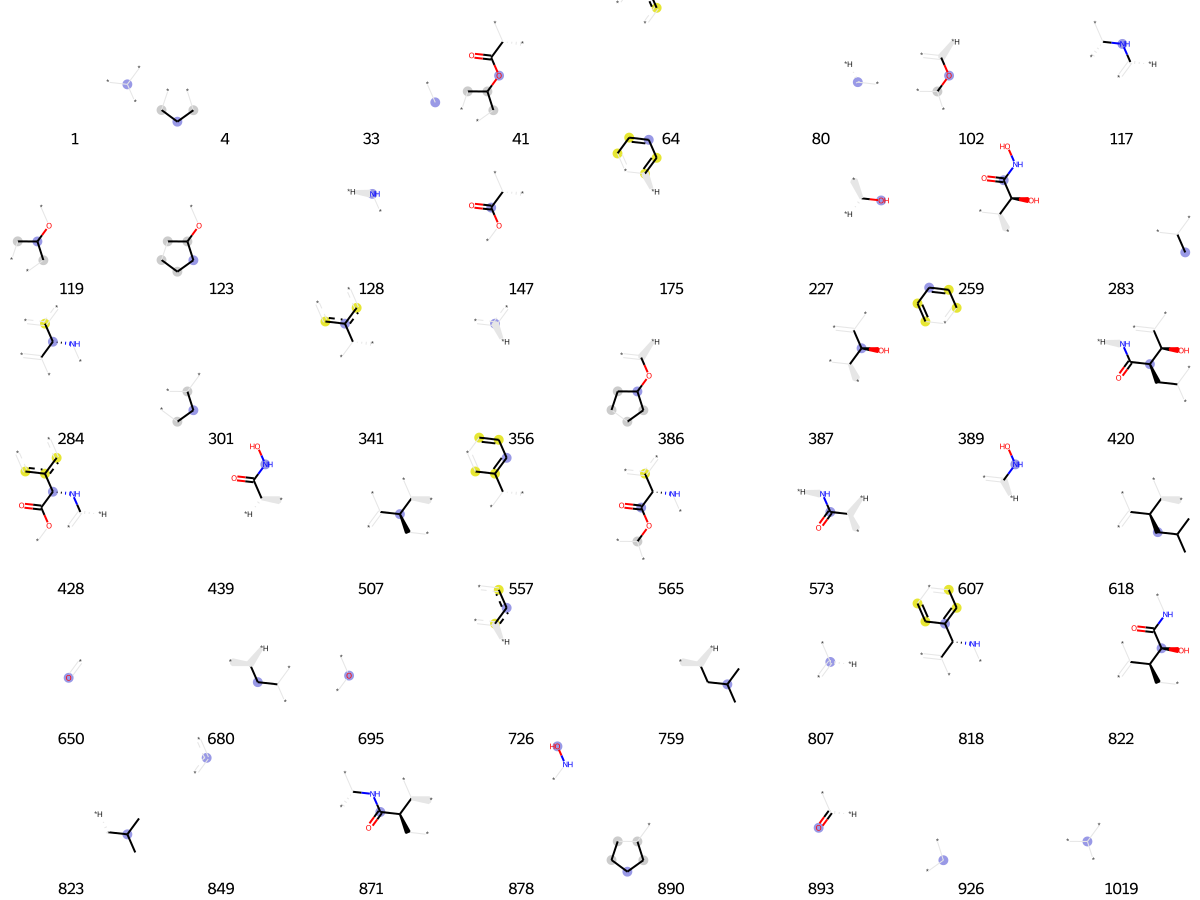

In [11608]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [11609]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[3,
 33,
 65,
 80,
 94,
 104,
 121,
 139,
 140,
 155,
 179,
 185,
 212,
 219,
 221,
 249,
 303,
 310,
 314,
 356,
 456,
 506,
 512,
 514,
 540,
 649,
 650,
 677,
 695,
 712,
 714,
 716,
 726,
 730,
 798,
 812,
 841,
 849,
 864,
 875,
 881,
 887,
 926,
 927,
 935,
 946,
 951,
 955,
 985]

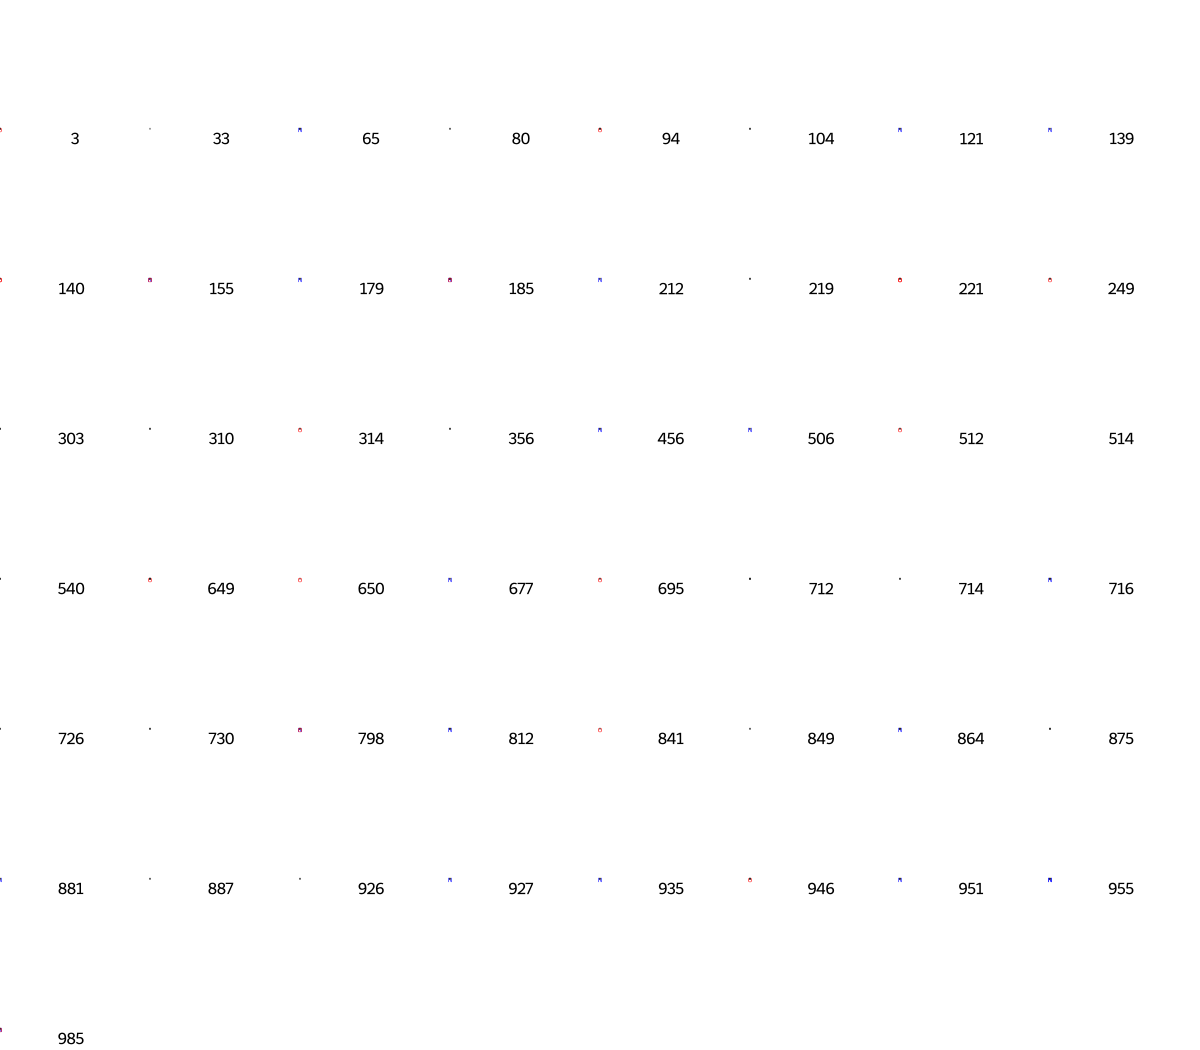

In [11610]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [11611]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[1,
 15,
 33,
 46,
 54,
 63,
 64,
 79,
 80,
 117,
 128,
 138,
 147,
 171,
 175,
 223,
 250,
 310,
 333,
 356,
 411,
 423,
 434,
 486,
 549,
 650,
 695,
 715,
 726,
 730,
 736,
 753,
 769,
 785,
 790,
 801,
 807,
 831,
 838,
 841,
 849,
 857,
 893,
 939,
 967,
 982]

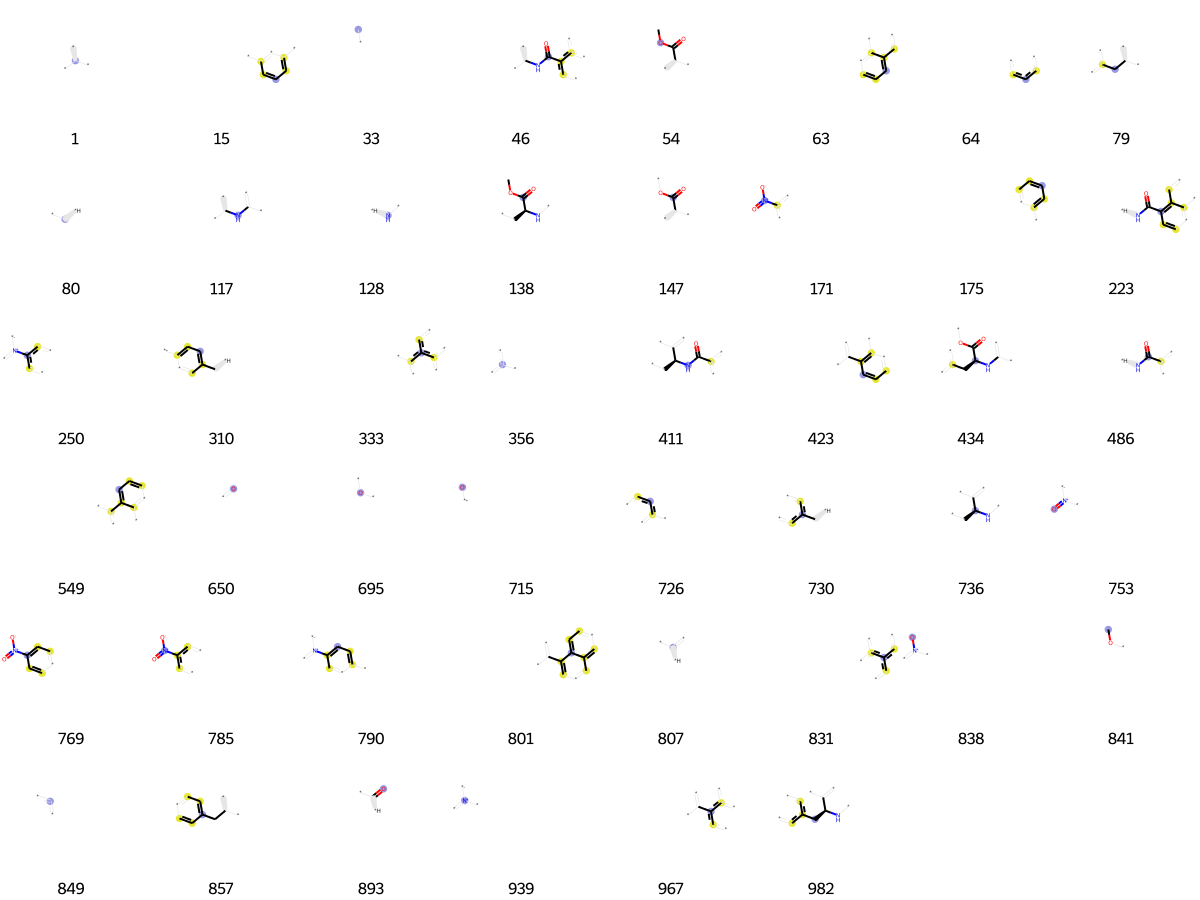

In [11612]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [11613]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[1,
 15,
 33,
 44,
 46,
 64,
 80,
 94,
 128,
 140,
 181,
 200,
 214,
 237,
 245,
 249,
 294,
 314,
 341,
 350,
 352,
 356,
 420,
 425,
 428,
 433,
 452,
 497,
 512,
 520,
 525,
 553,
 570,
 642,
 650,
 672,
 683,
 692,
 695,
 723,
 726,
 747,
 792,
 807,
 819,
 829,
 841,
 849,
 875,
 879,
 893,
 929,
 935,
 946,
 979,
 984,
 1013,
 1017]

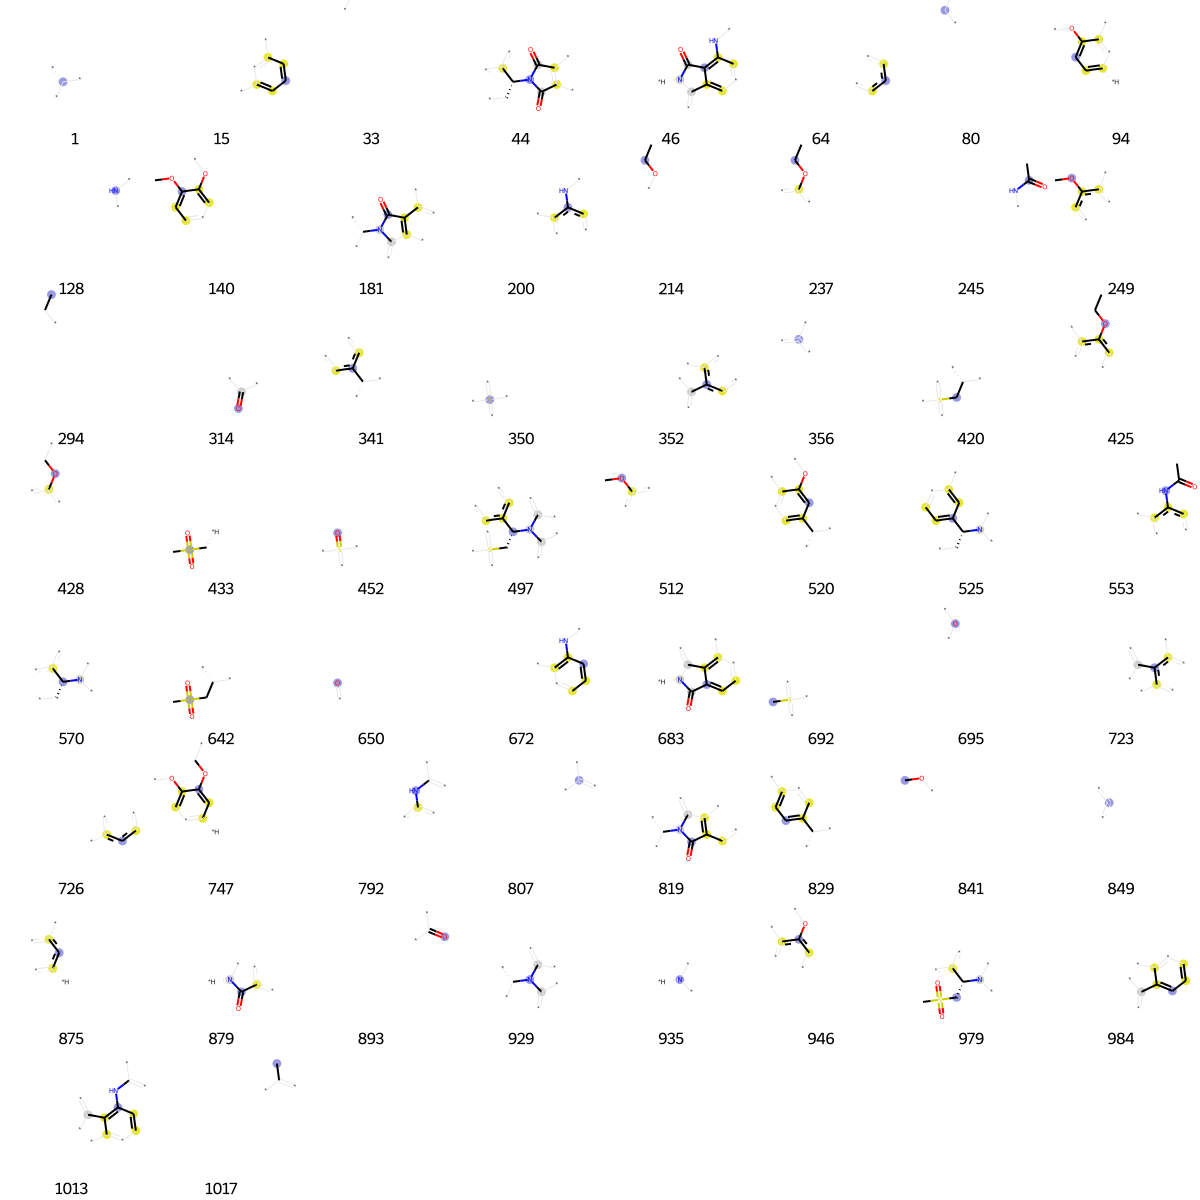

In [11614]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [11615]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[33,
 36,
 72,
 114,
 130,
 138,
 144,
 250,
 301,
 364,
 392,
 558,
 580,
 674,
 732,
 807,
 879,
 884,
 926,
 1019]

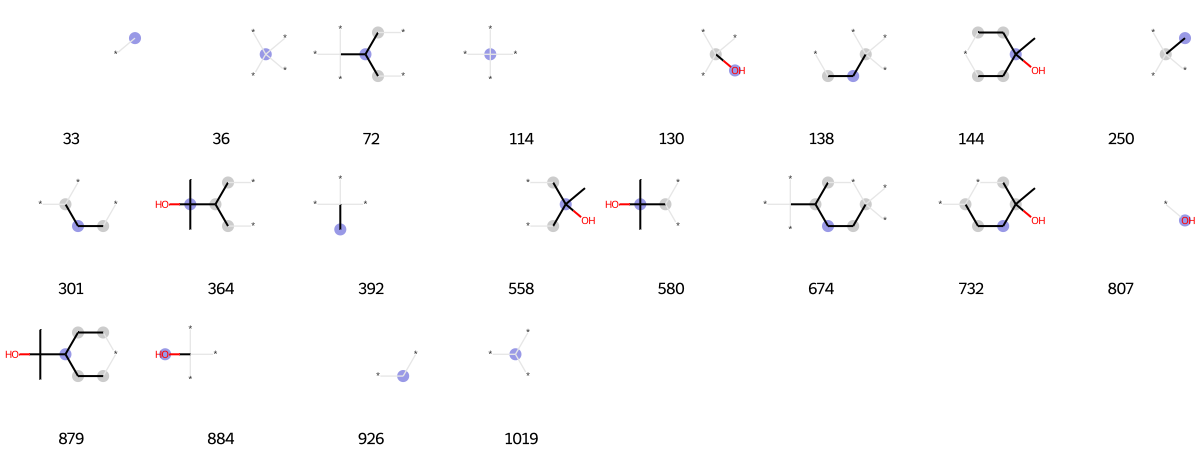

In [11616]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [11617]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[2,
 10,
 13,
 33,
 37,
 64,
 80,
 102,
 112,
 113,
 114,
 139,
 175,
 232,
 271,
 274,
 294,
 322,
 356,
 361,
 389,
 428,
 434,
 540,
 571,
 650,
 652,
 673,
 688,
 693,
 695,
 713,
 718,
 726,
 804,
 807,
 815,
 849,
 852,
 880,
 881,
 884,
 893,
 898,
 927,
 953,
 961]

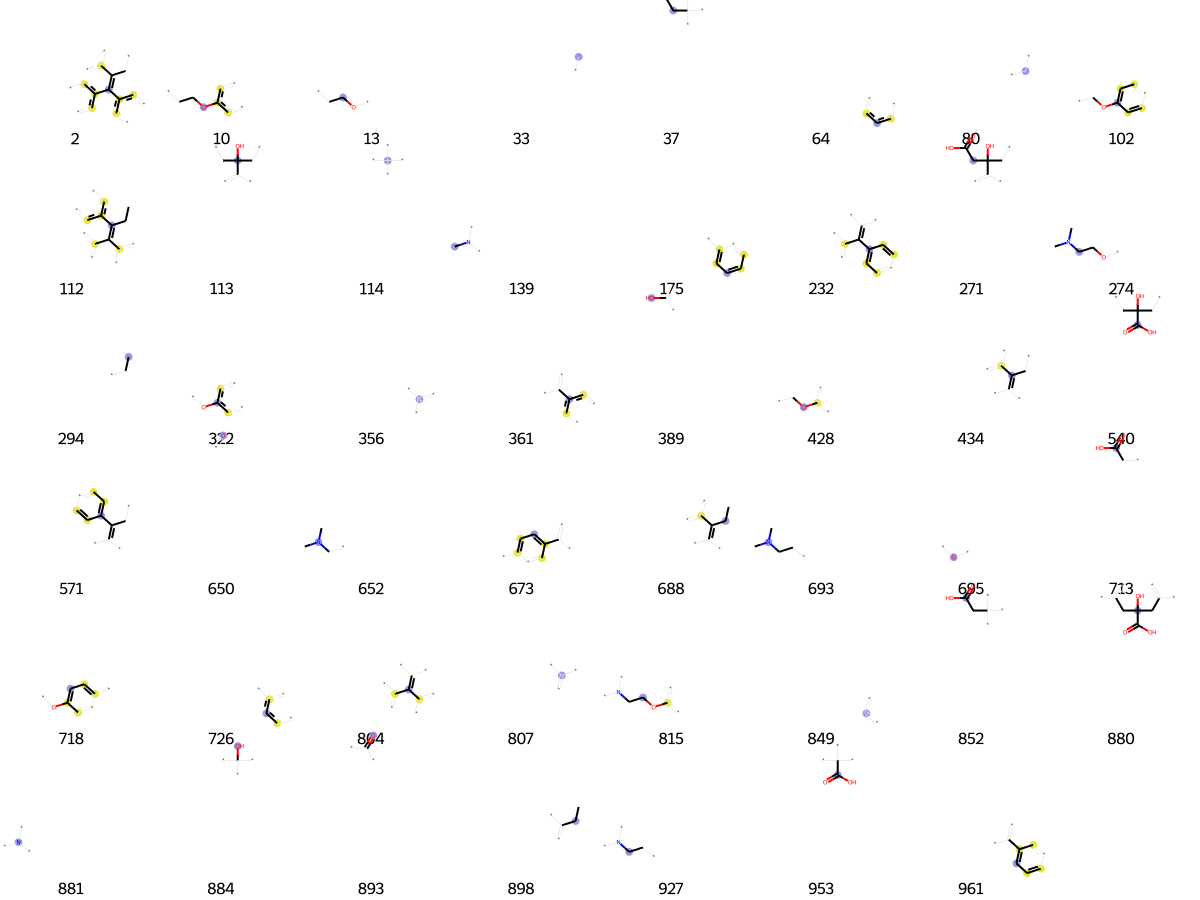

In [11618]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [11619]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[14,
 15,
 27,
 33,
 42,
 64,
 80,
 81,
 90,
 114,
 121,
 128,
 136,
 200,
 207,
 212,
 217,
 226,
 231,
 234,
 262,
 271,
 314,
 356,
 381,
 407,
 417,
 419,
 429,
 456,
 478,
 484,
 486,
 523,
 583,
 597,
 650,
 656,
 726,
 730,
 736,
 741,
 744,
 747,
 754,
 767,
 769,
 784,
 785,
 792,
 806,
 807,
 809,
 825,
 847,
 849,
 855,
 875,
 891,
 893,
 896,
 904,
 926,
 935,
 947,
 950,
 967,
 986]

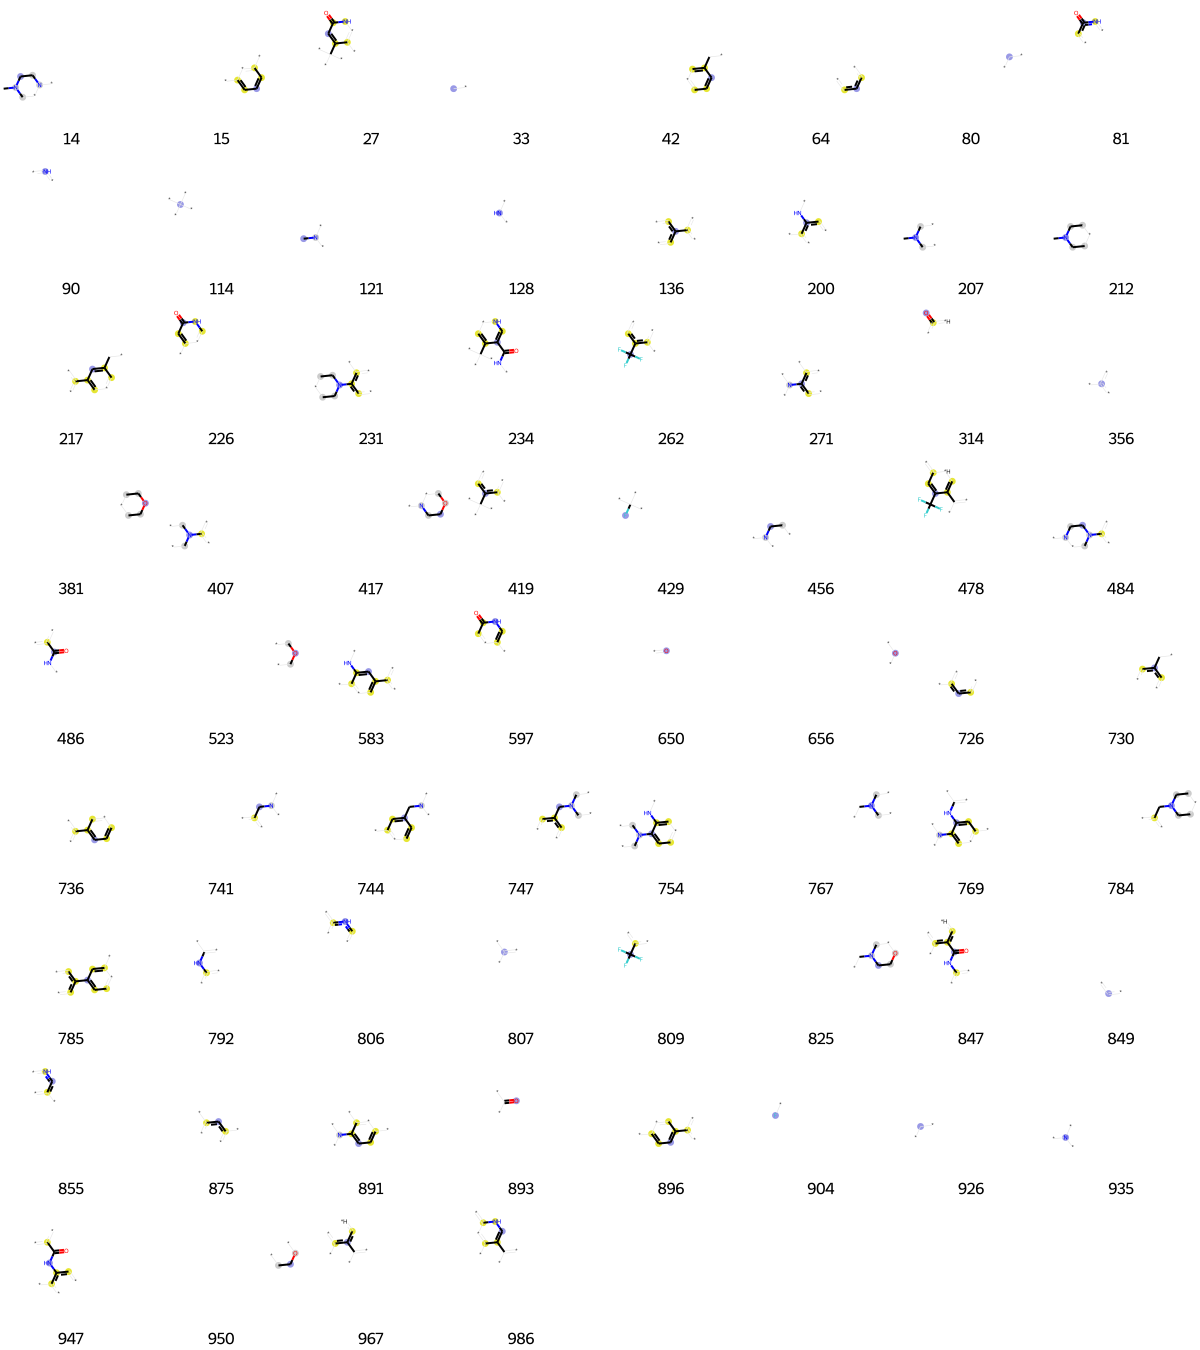

In [11620]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [11621]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[1,
 15,
 17,
 36,
 42,
 64,
 80,
 114,
 128,
 130,
 132,
 136,
 138,
 144,
 192,
 197,
 236,
 260,
 265,
 272,
 301,
 319,
 356,
 361,
 378,
 393,
 416,
 428,
 429,
 448,
 456,
 463,
 486,
 498,
 511,
 524,
 526,
 574,
 587,
 595,
 610,
 650,
 652,
 678,
 712,
 726,
 739,
 763,
 778,
 807,
 809,
 814,
 833,
 842,
 849,
 860,
 875,
 893,
 896,
 904,
 914,
 926,
 935,
 961,
 985,
 993,
 1009,
 1019,
 1022]

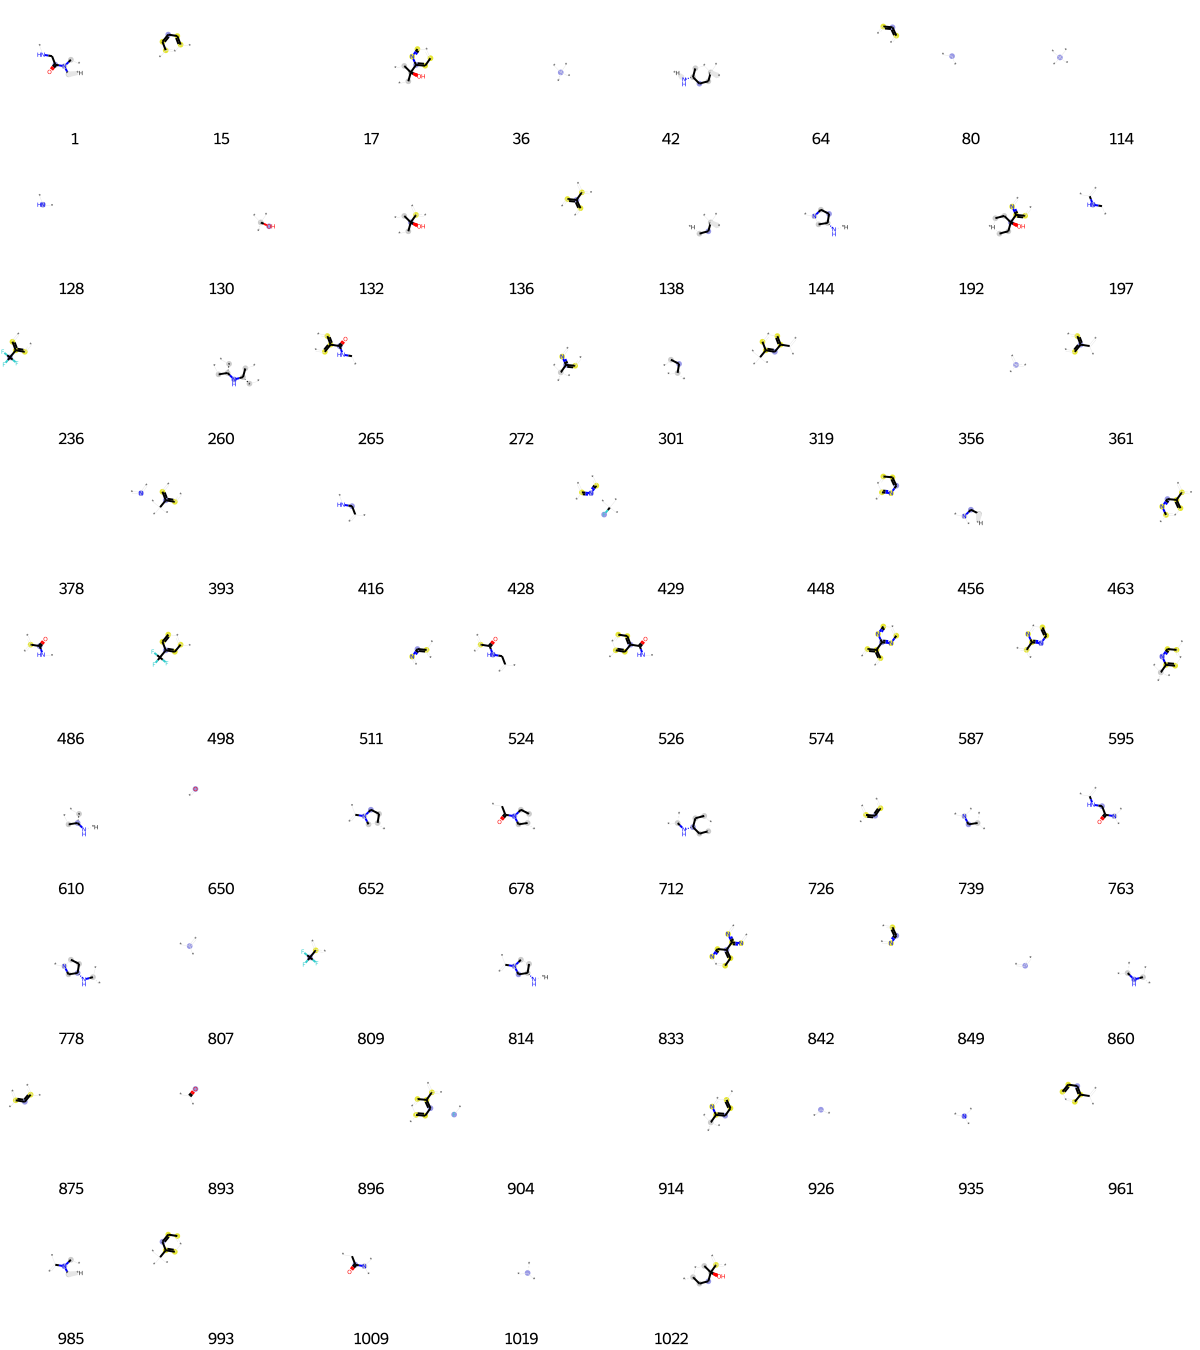

In [11622]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [11623]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[8,
 14,
 16,
 33,
 36,
 42,
 46,
 60,
 69,
 80,
 90,
 91,
 119,
 126,
 128,
 145,
 182,
 195,
 200,
 204,
 219,
 225,
 227,
 233,
 250,
 252,
 263,
 264,
 275,
 300,
 312,
 328,
 342,
 351,
 356,
 362,
 378,
 389,
 410,
 446,
 534,
 539,
 540,
 562,
 571,
 578,
 591,
 602,
 611,
 621,
 644,
 650,
 679,
 694,
 695,
 698,
 706,
 710,
 713,
 721,
 777,
 787,
 790,
 807,
 831,
 841,
 849,
 857,
 860,
 874,
 875,
 893,
 906,
 911,
 980,
 987,
 1010,
 1019]

In [11624]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[26,
 29,
 33,
 116,
 119,
 121,
 128,
 182,
 191,
 206,
 207,
 221,
 246,
 249,
 301,
 350,
 356,
 366,
 392,
 412,
 452,
 456,
 502,
 503,
 512,
 524,
 561,
 589,
 607,
 650,
 659,
 666,
 677,
 695,
 726,
 728,
 739,
 743,
 744,
 758,
 833,
 841,
 843,
 849,
 852,
 875,
 926,
 935,
 946,
 959,
 993,
 1019]

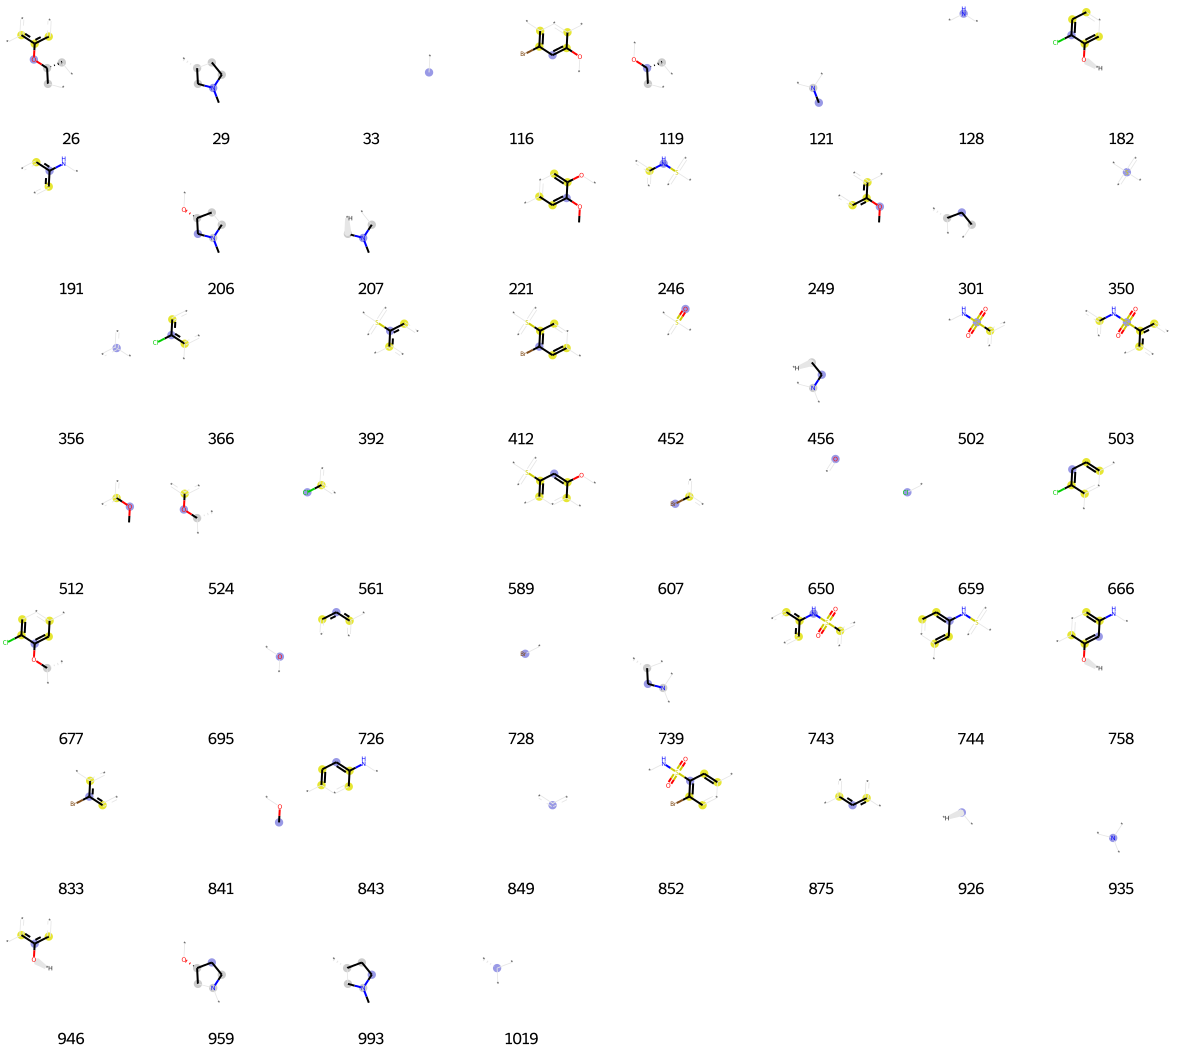

In [11625]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [11626]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[33,
 42,
 64,
 80,
 114,
 147,
 175,
 356,
 389,
 392,
 514,
 558,
 647,
 670,
 672,
 675,
 726,
 730,
 849,
 888]

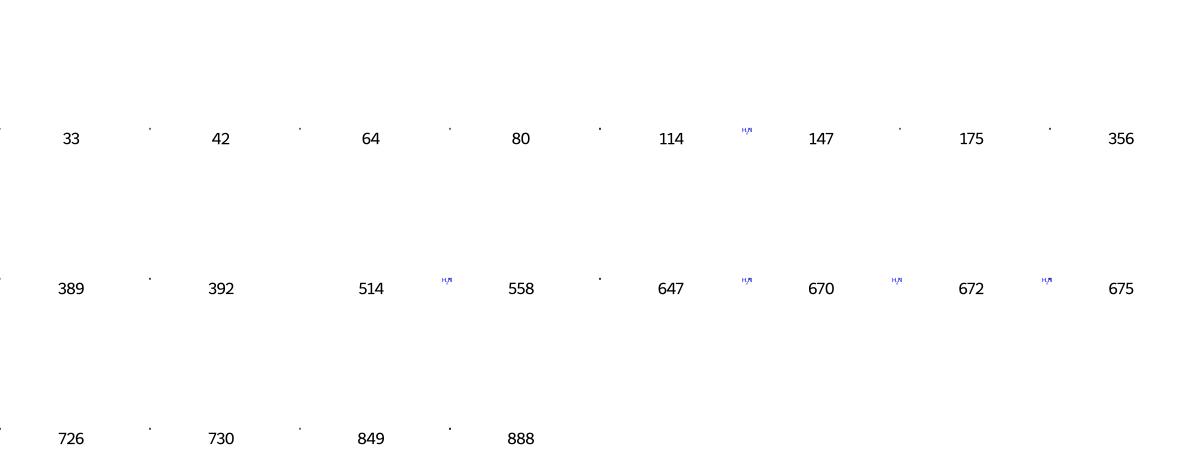

In [11627]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [11628]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[15,
 64,
 114,
 125,
 143,
 262,
 298,
 314,
 352,
 356,
 361,
 389,
 447,
 452,
 456,
 457,
 578,
 583,
 587,
 650,
 675,
 723,
 726,
 787,
 807,
 849,
 875,
 893,
 901,
 984]

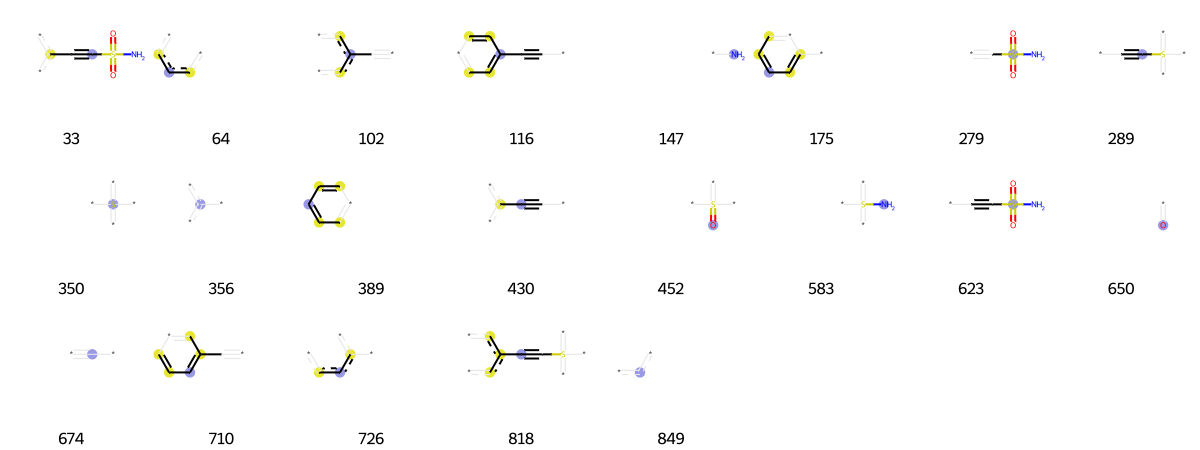

In [11629]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [11630]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[18,
 33,
 276,
 324,
 370,
 426,
 456,
 527,
 573,
 575,
 650,
 721,
 787,
 807,
 893,
 926,
 935,
 985,
 1017]

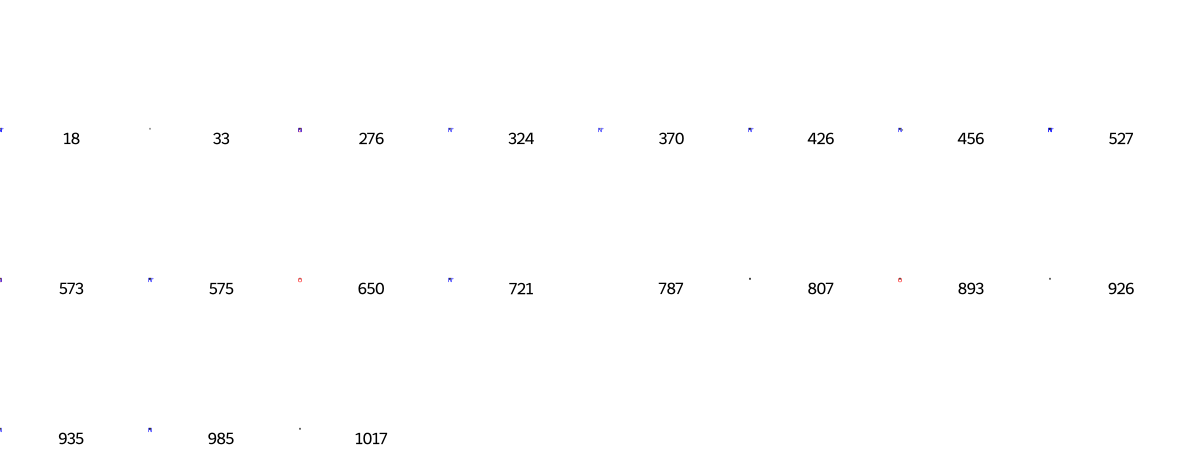

In [11631]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [11632]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[42,
 64,
 80,
 128,
 140,
 147,
 175,
 197,
 210,
 244,
 255,
 339,
 356,
 378,
 389,
 393,
 433,
 435,
 439,
 453,
 454,
 459,
 490,
 514,
 549,
 561,
 603,
 638,
 650,
 659,
 689,
 725,
 726,
 730,
 749,
 807,
 831,
 849,
 893,
 956,
 991,
 1017]

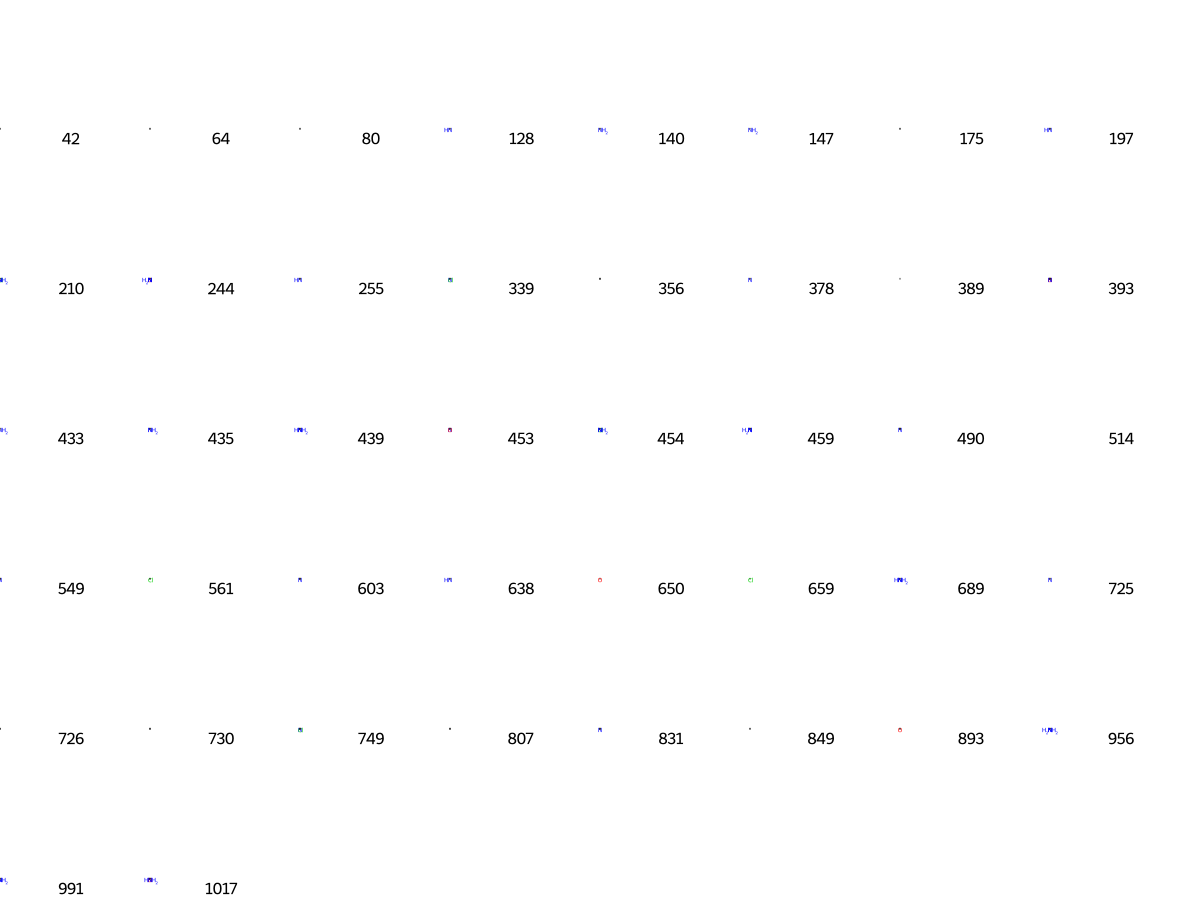

In [11633]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [11634]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[1,
 15,
 29,
 33,
 42,
 64,
 80,
 96,
 102,
 112,
 117,
 121,
 136,
 158,
 207,
 212,
 217,
 221,
 285,
 301,
 305,
 314,
 322,
 356,
 360,
 361,
 378,
 425,
 428,
 456,
 511,
 574,
 650,
 672,
 674,
 695,
 710,
 726,
 730,
 736,
 741,
 744,
 749,
 790,
 800,
 806,
 818,
 849,
 859,
 867,
 875,
 925,
 926,
 932,
 935,
 945,
 951,
 980,
 993,
 1006,
 1009,
 1019]

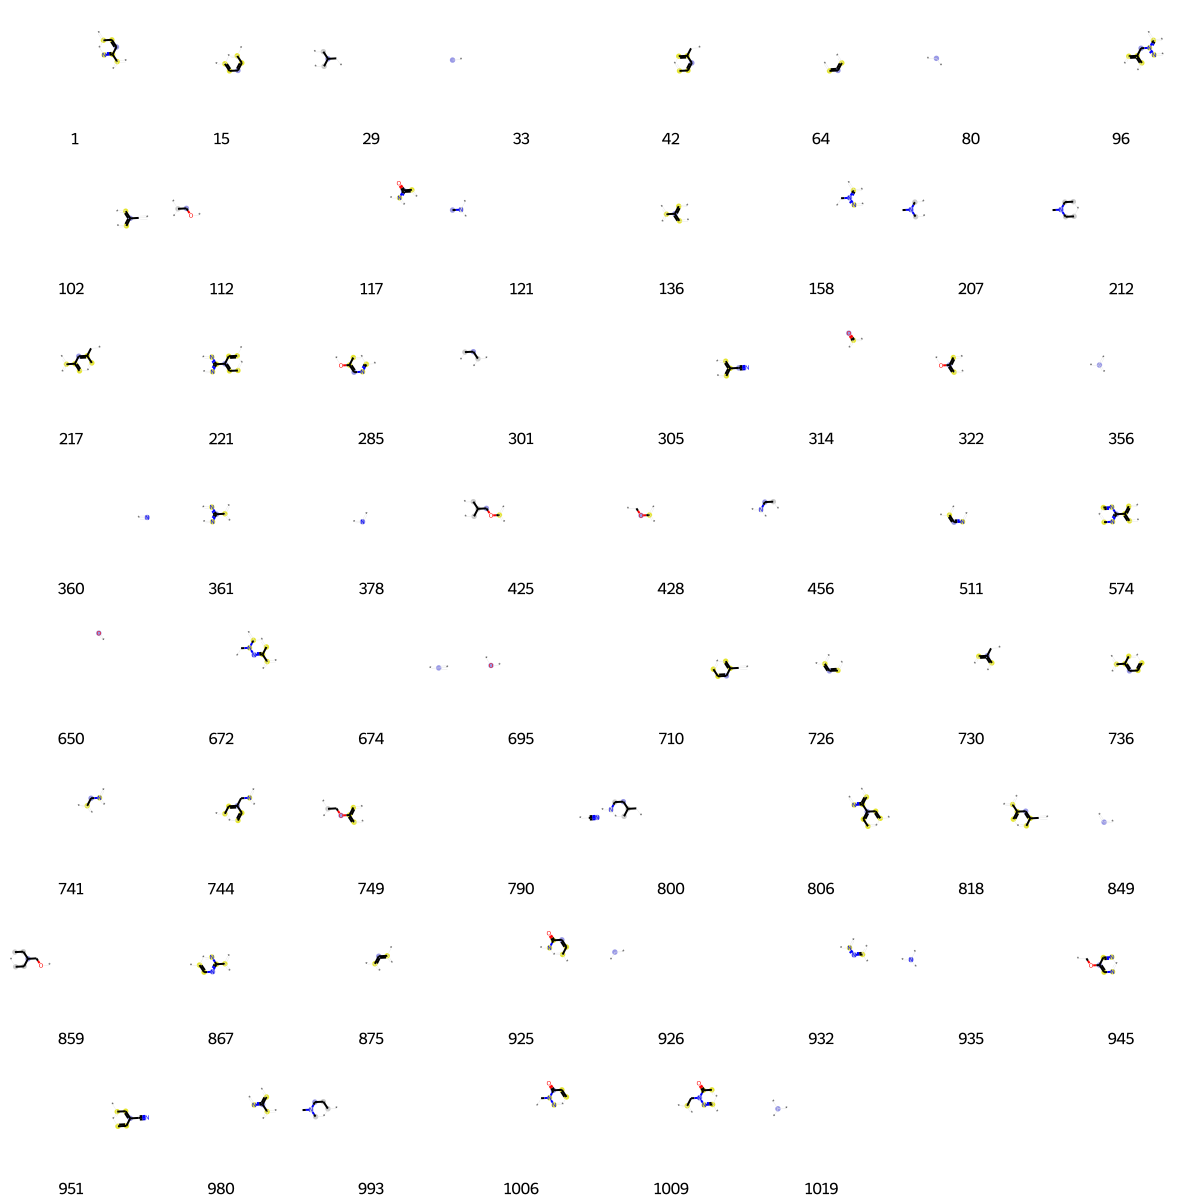

In [11635]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [11636]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[13,
 31,
 33,
 49,
 79,
 80,
 121,
 128,
 147,
 195,
 200,
 306,
 314,
 356,
 396,
 564,
 588,
 650,
 690,
 694,
 695,
 714,
 784,
 798,
 807,
 841,
 893,
 895,
 926,
 935,
 976]

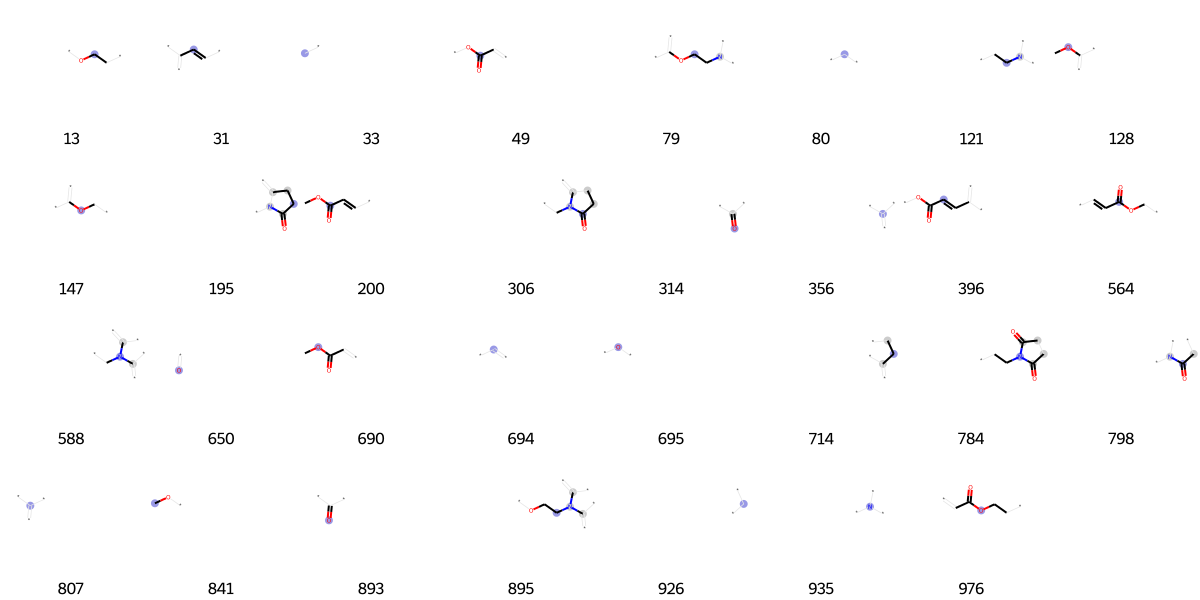

In [11637]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [11638]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[8,
 44,
 53,
 64,
 73,
 80,
 83,
 114,
 128,
 157,
 162,
 175,
 226,
 291,
 310,
 325,
 352,
 356,
 378,
 389,
 406,
 407,
 412,
 451,
 570,
 573,
 650,
 675,
 680,
 699,
 712,
 726,
 730,
 739,
 741,
 744,
 747,
 767,
 807,
 816,
 827,
 831,
 849,
 875,
 885,
 893,
 904,
 910,
 926,
 935,
 944,
 974,
 975,
 980,
 1019,
 1021]

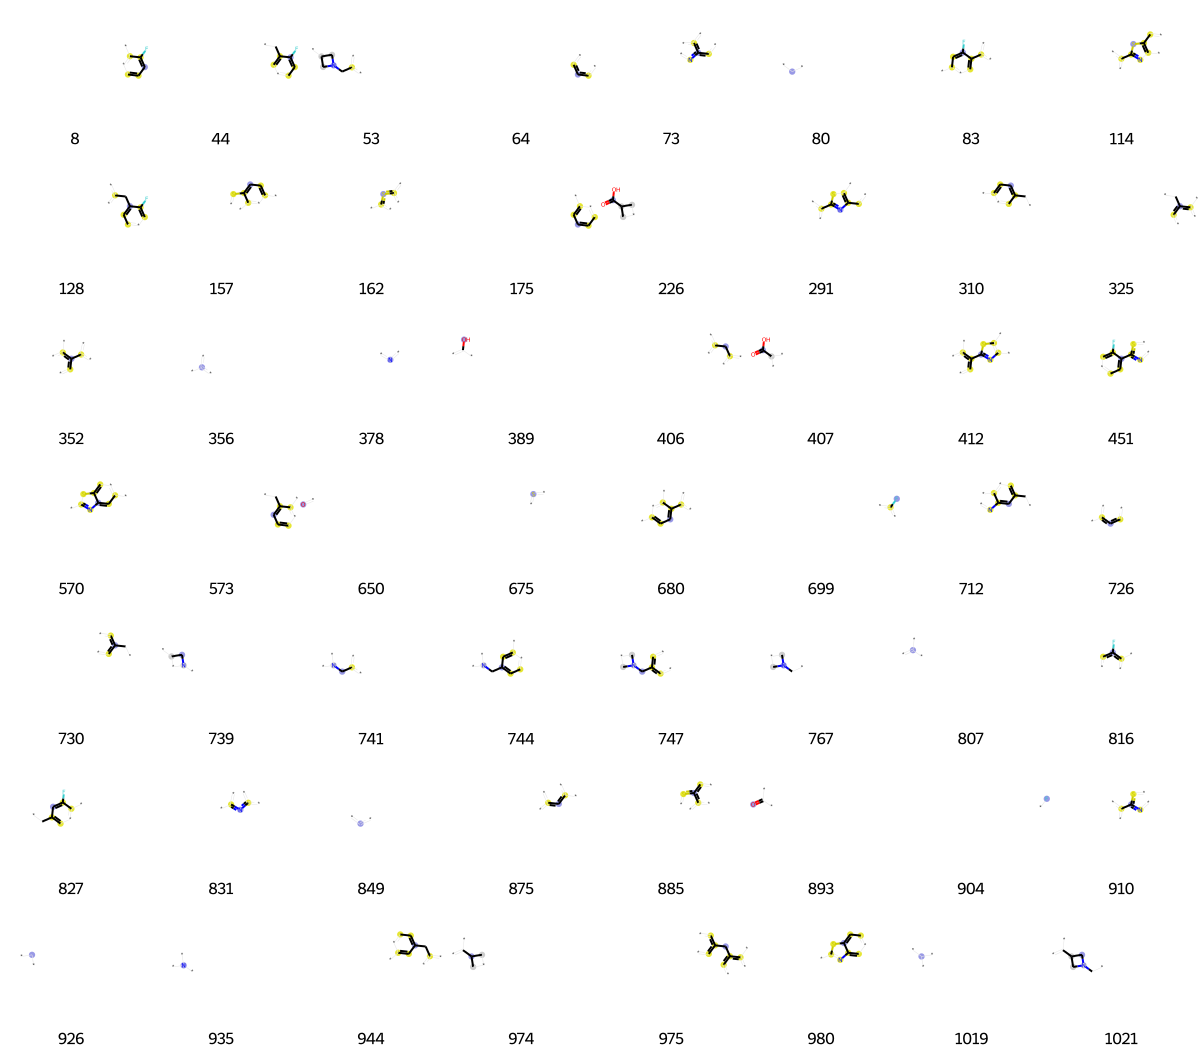

In [11639]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [11640]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[13,
 52,
 64,
 69,
 73,
 74,
 90,
 128,
 147,
 160,
 175,
 255,
 289,
 356,
 378,
 433,
 435,
 591,
 641,
 700,
 726,
 800,
 831,
 849,
 980]

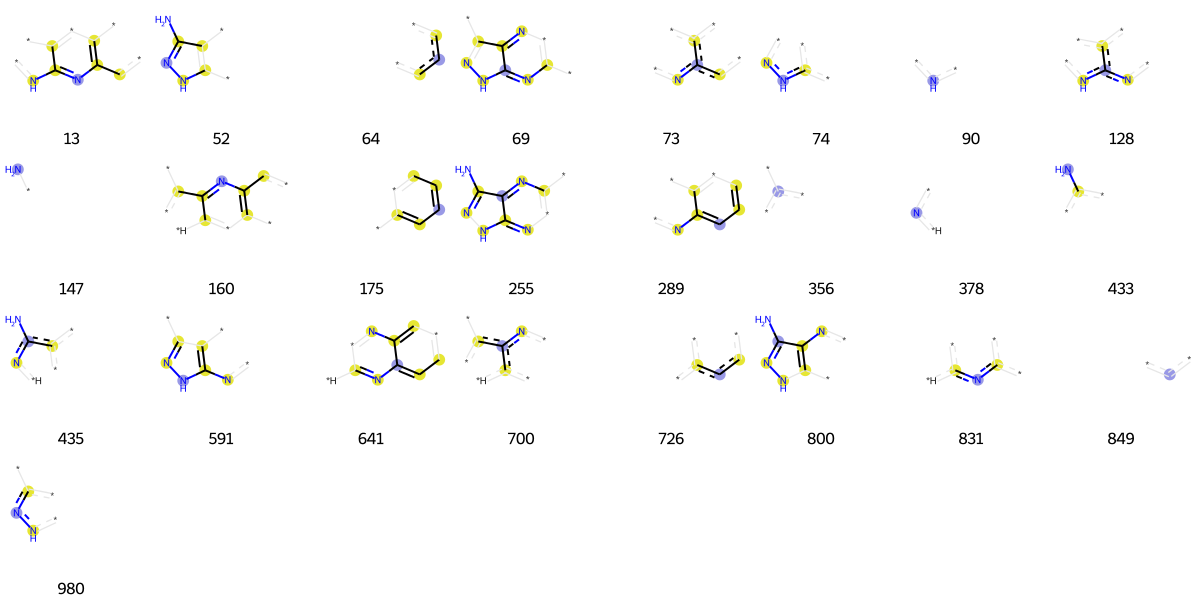

In [11641]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [11642]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[13,
 19,
 33,
 64,
 80,
 119,
 145,
 147,
 225,
 294,
 356,
 361,
 378,
 420,
 437,
 498,
 511,
 562,
 568,
 579,
 591,
 650,
 695,
 710,
 726,
 794,
 807,
 842,
 849,
 881,
 887,
 893,
 938,
 961]

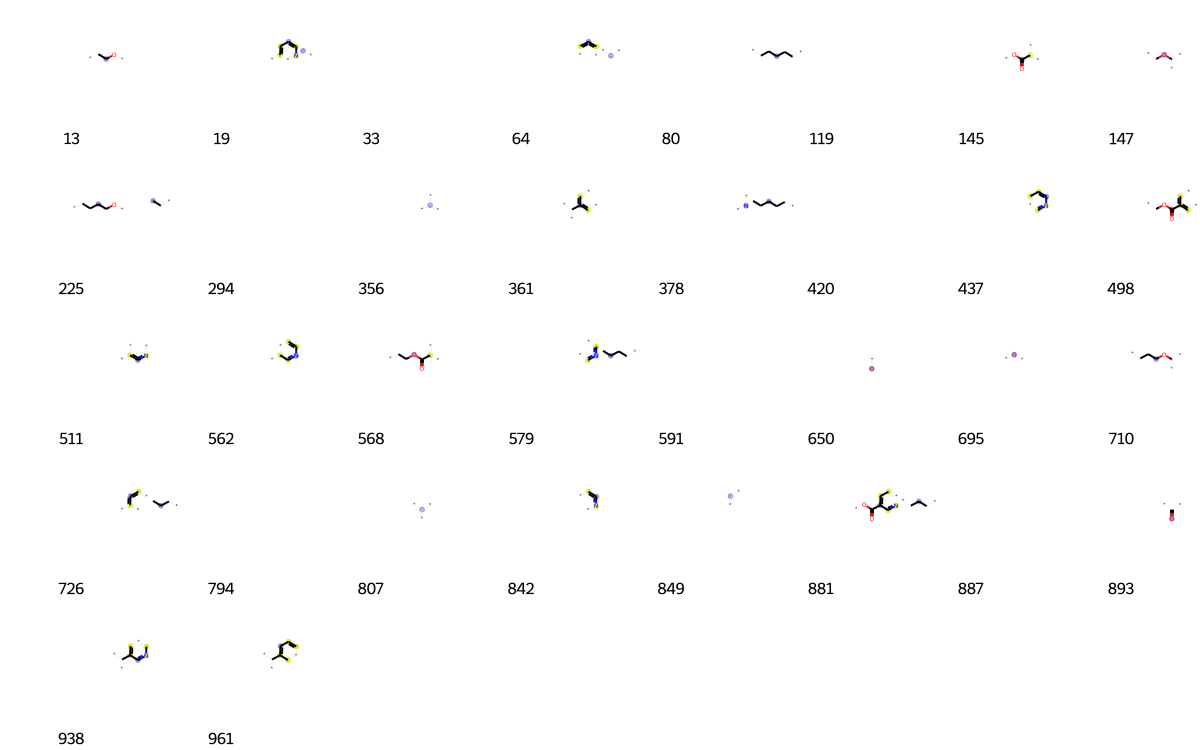

In [11643]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [11644]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[33,
 121,
 123,
 128,
 145,
 207,
 240,
 242,
 269,
 344,
 356,
 446,
 456,
 650,
 695,
 713,
 757,
 777,
 804,
 807,
 841,
 849,
 851,
 893,
 906,
 922,
 926,
 935]

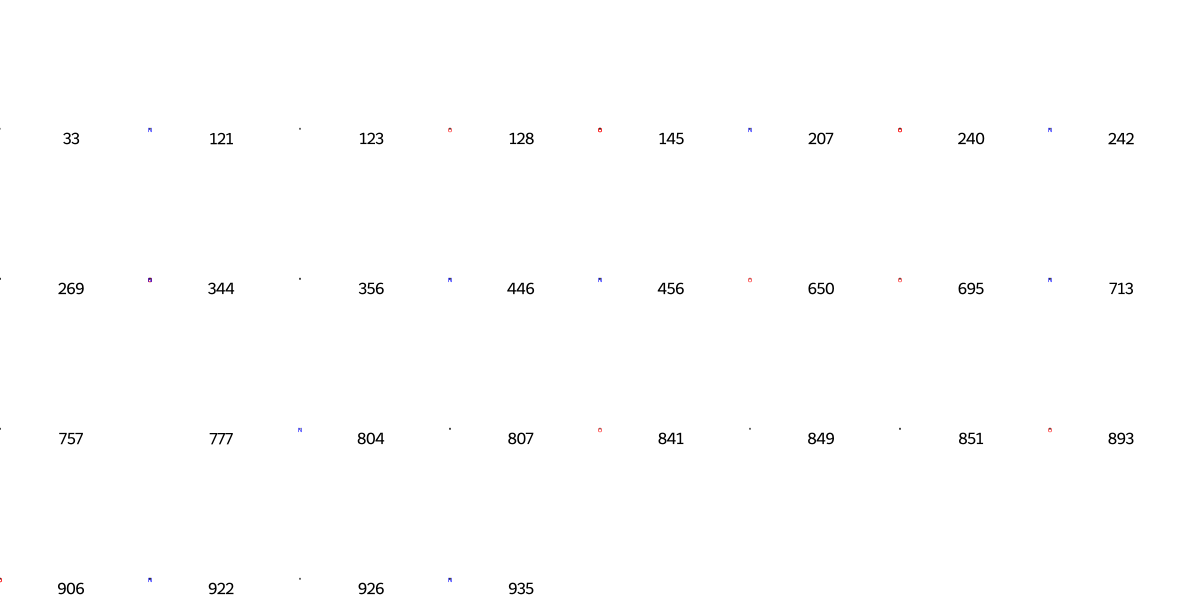

In [11645]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [11646]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1, 219, 389, 449, 650, 659, 807, 820, 893, 914]

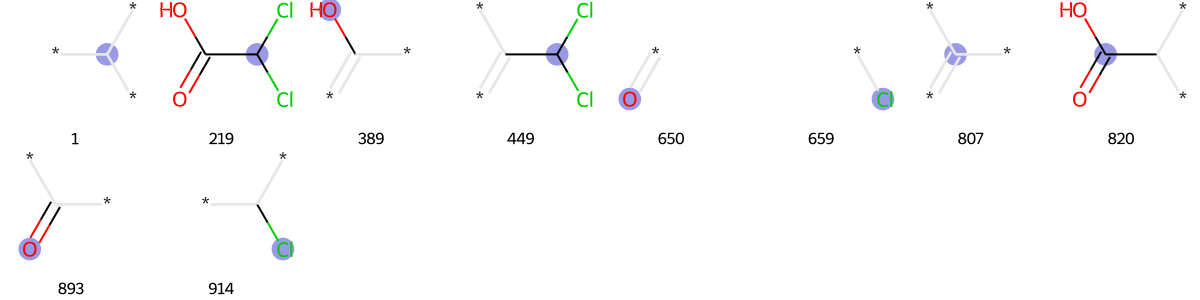

In [11647]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [11648]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[1,
 4,
 8,
 33,
 35,
 36,
 56,
 80,
 98,
 103,
 114,
 118,
 133,
 137,
 138,
 206,
 231,
 233,
 243,
 250,
 268,
 283,
 284,
 301,
 336,
 342,
 344,
 356,
 392,
 395,
 444,
 453,
 472,
 478,
 490,
 549,
 590,
 632,
 636,
 669,
 678,
 681,
 694,
 714,
 739,
 753,
 784,
 807,
 855,
 860,
 884,
 887,
 890,
 921,
 926,
 1019]

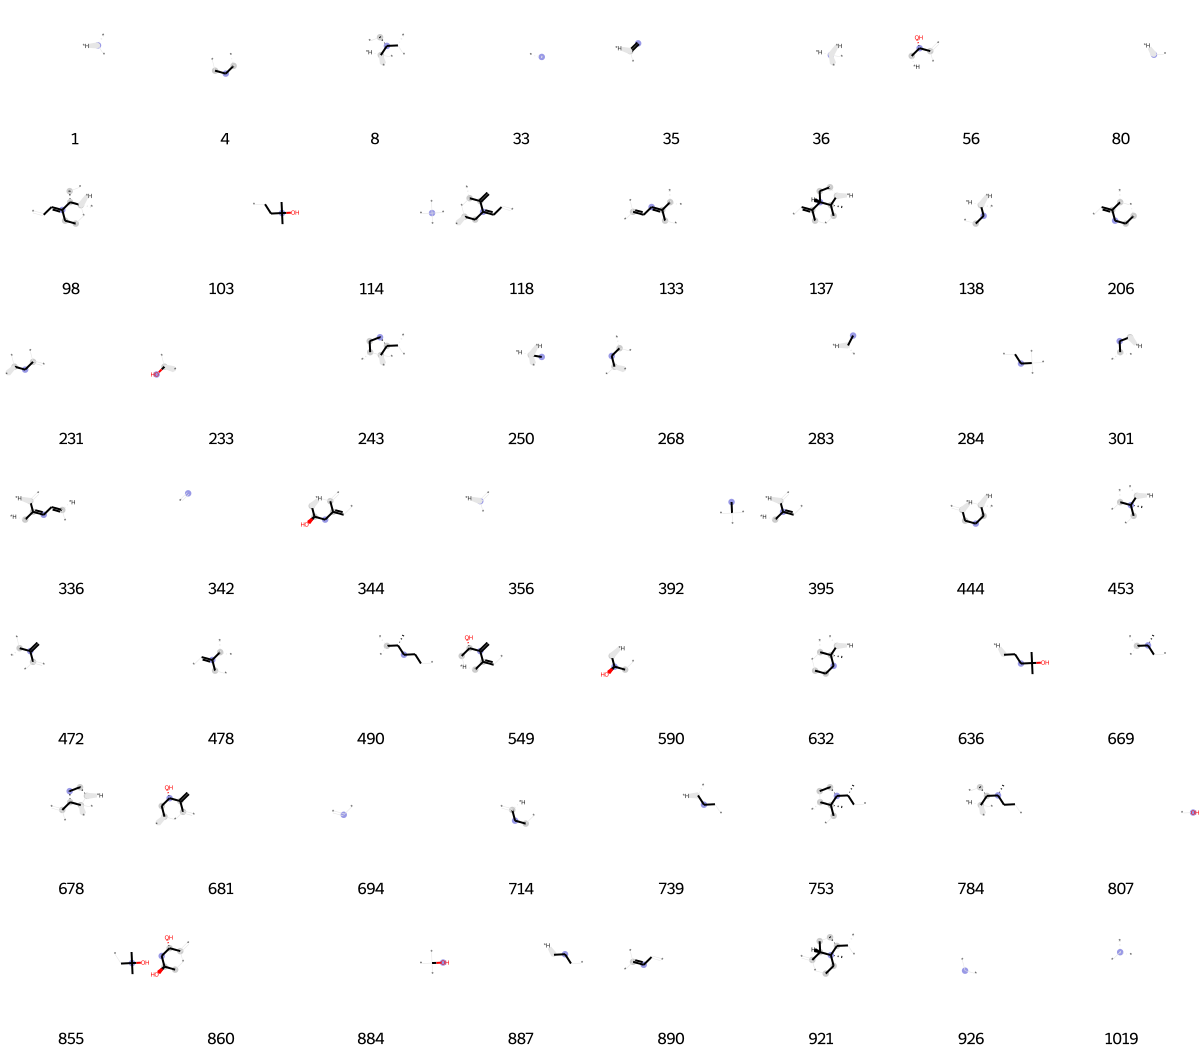

In [11649]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [11650]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 33,
 114,
 128,
 165,
 171,
 184,
 191,
 262,
 283,
 324,
 325,
 354,
 356,
 419,
 429,
 570,
 573,
 640,
 650,
 715,
 716,
 726,
 735,
 753,
 792,
 807,
 809,
 838,
 843,
 849,
 875,
 893,
 904,
 931,
 939,
 1019]

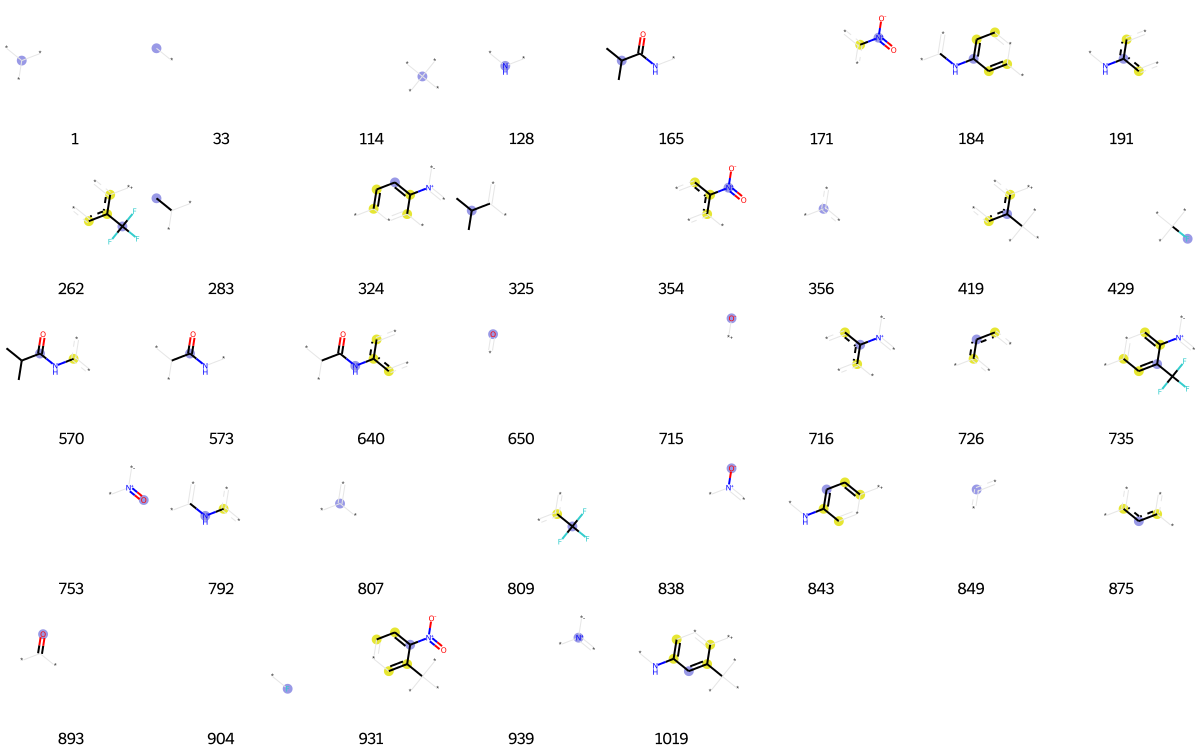

In [11651]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])